In [1]:
##Imports
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
## This is to get the connection to the nba endpoints correctly (hot fix to work until they push changes)
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [3]:
## Build the team name to team_id map
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
list_teams = ['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL'
        , 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC'
        , 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']
i = 0
team_to_id = {}
for t in list_teams:
    team_to_id.update({t: nba_teams[i]['id']})
    i += 1

In [57]:
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.endpoints import winprobabilitypbp

In [62]:
def plot_game_win_probability(win_probability, title):
    home_pct = win_probability['HOME_PCT'].values
    visit_pct = win_probability['VISITOR_PCT'].values
    ind = range(len(home_pct))
    baseline = [0.5] * len(home_pct)
    plt.plot(ind, home_pct, 'g.')
    plt.plot(ind, visit_pct, 'r^')
    plt.plot(ind, baseline, 'k-')
    plt.title(title)
    if '@' in title:
        plt.legend((title[-3:], title[:3]))
    else:
        plt.legend((title[:3], title[-3:]))
    plt.show()

In [63]:
def generate_win_probability_team(team):
    gpbp = teamgamelog.TeamGameLog(team_id=team_to_id[team], headers=headers)
    tgl = gpbp.get_data_frames()[0]
    games = tgl['Game_ID'].values
    matchups = tgl['MATCHUP'].values
    i = 0
    for game in games:
        wpp = winprobabilitypbp.WinProbabilityPBP(game_id=game, headers=headers)
        wp = wpp.get_data_frames()[0]
        plot_game_win_probability(wp, matchups[i])
        i += 1

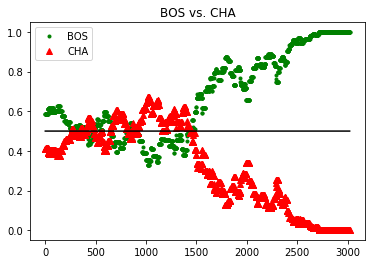

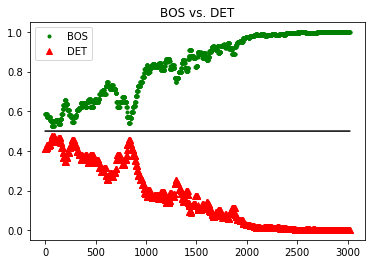

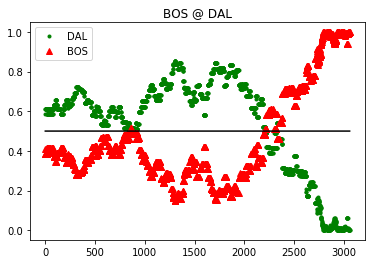

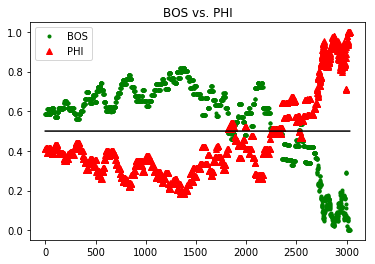

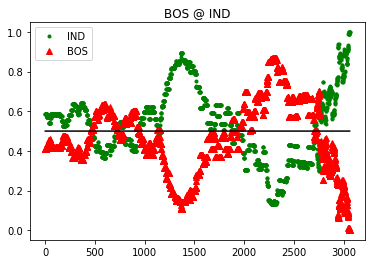

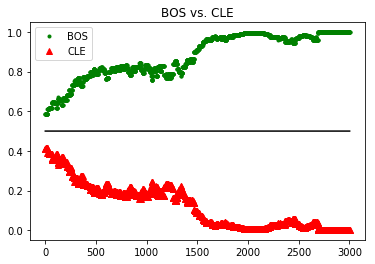

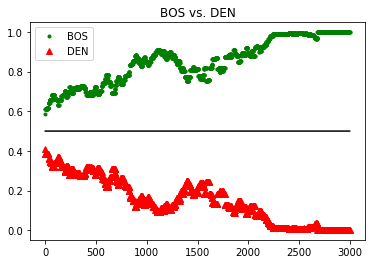

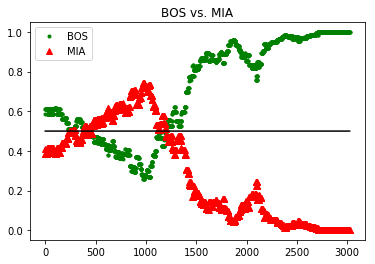

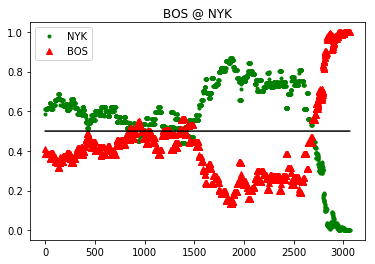

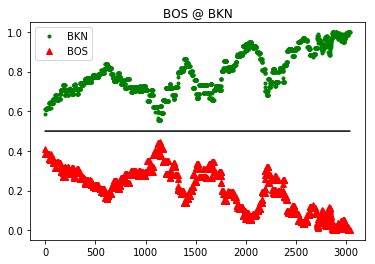

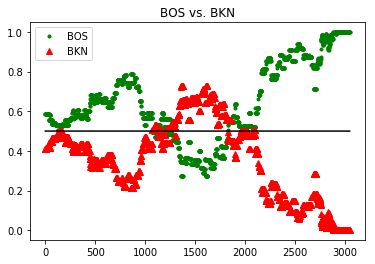

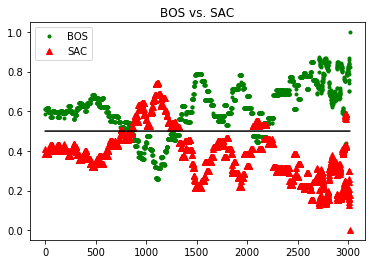

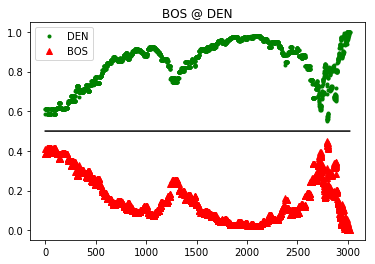

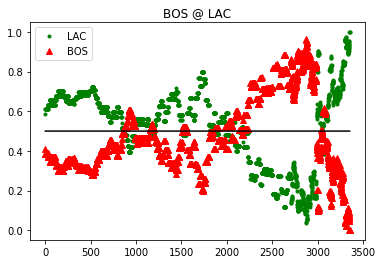

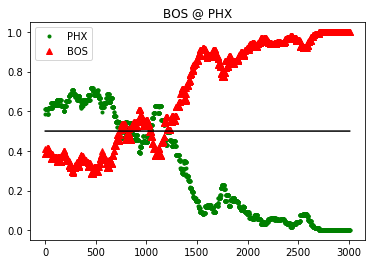

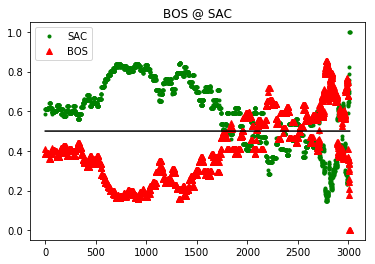

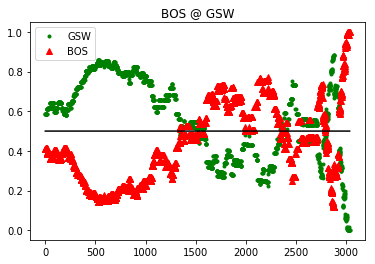

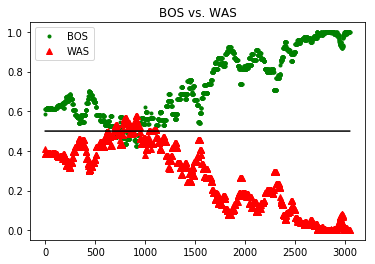

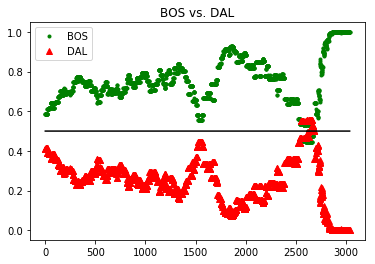

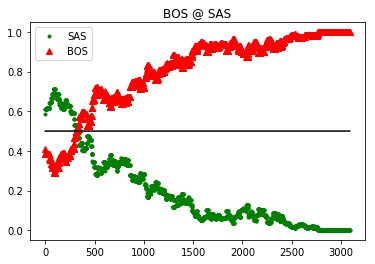

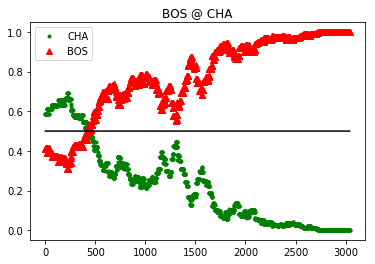

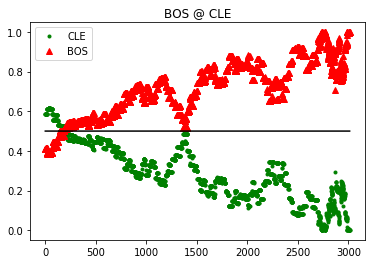

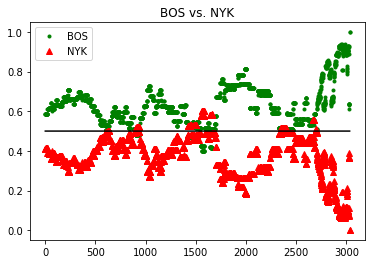

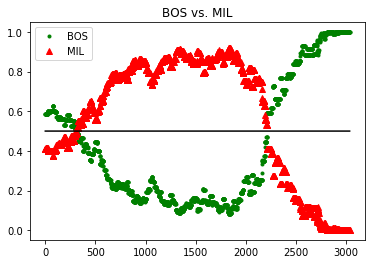

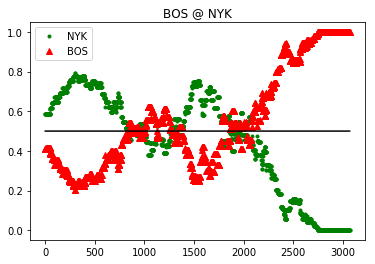

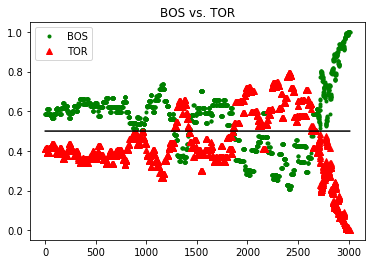

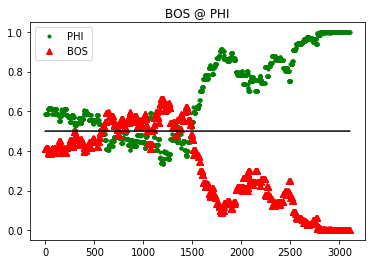

In [64]:
generate_win_probability_team('BOS')

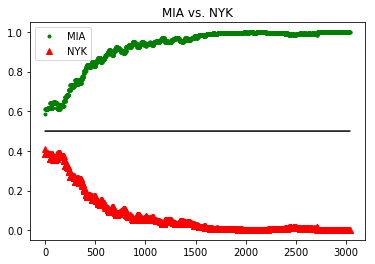

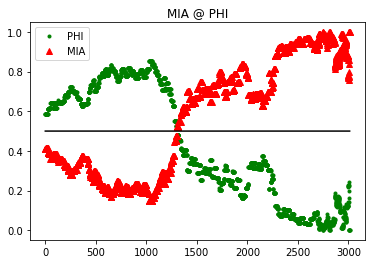

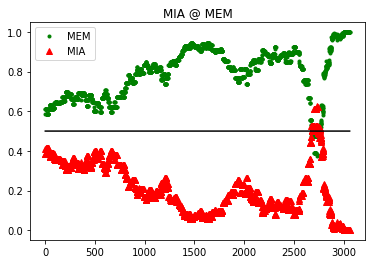

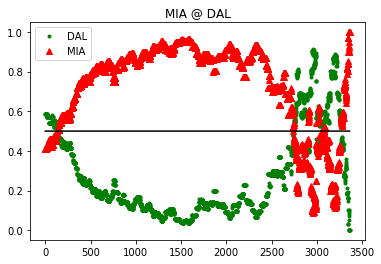

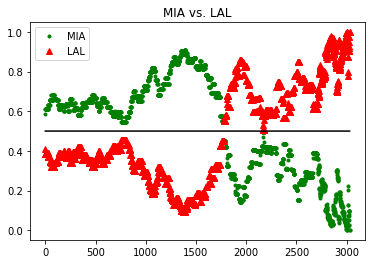

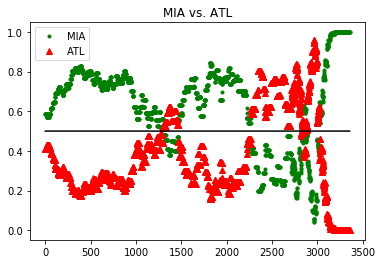

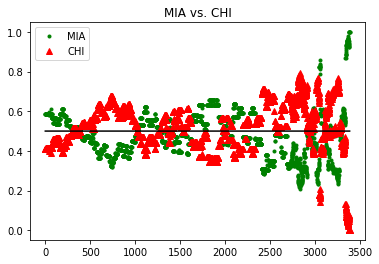

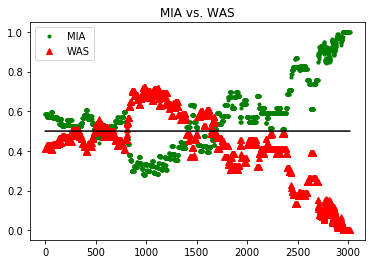

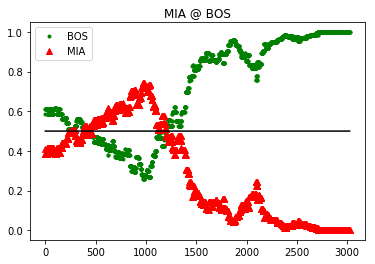

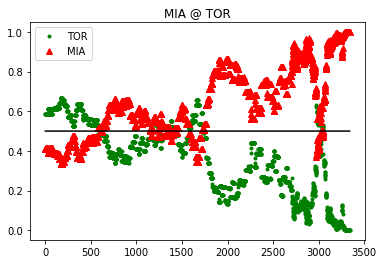

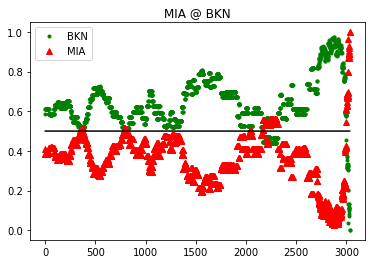

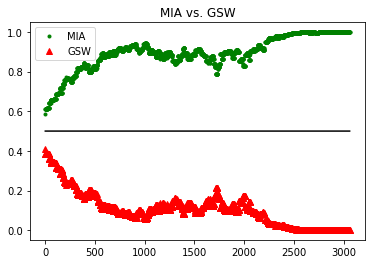

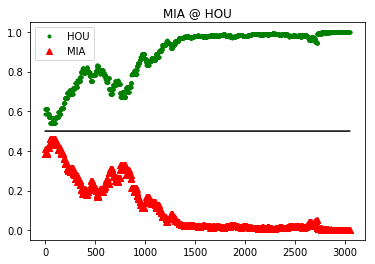

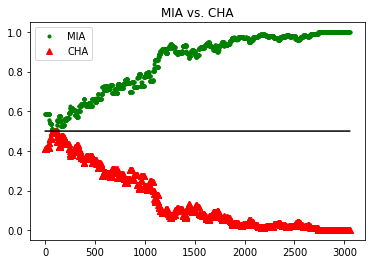

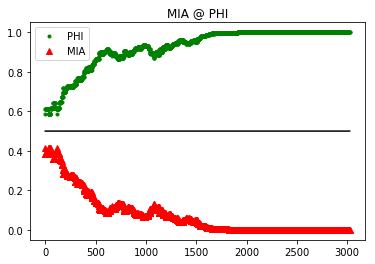

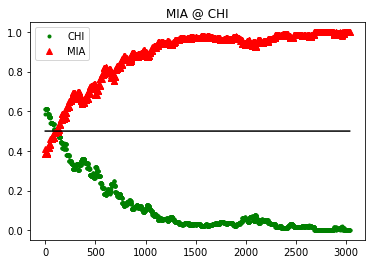

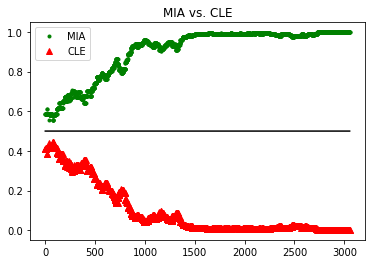

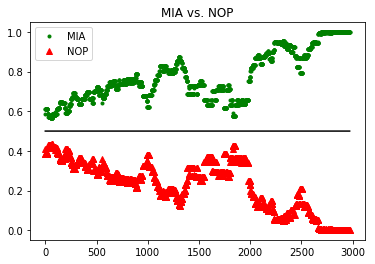

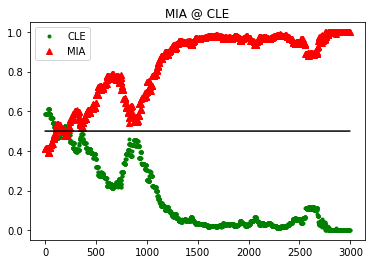

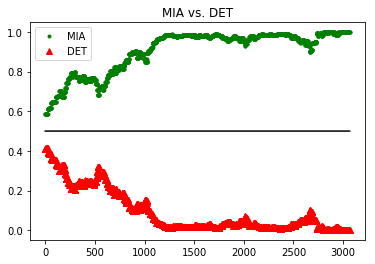

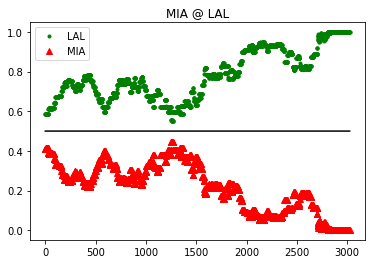

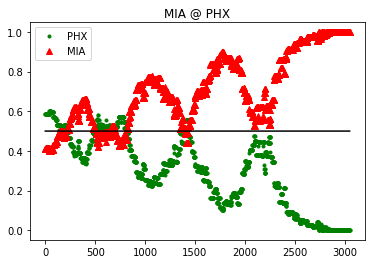

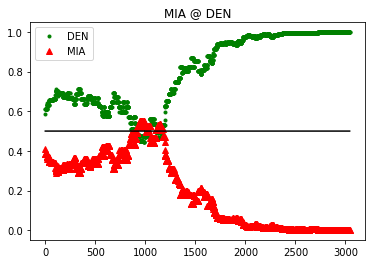

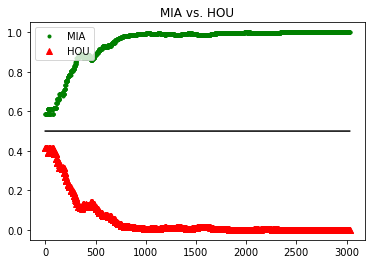

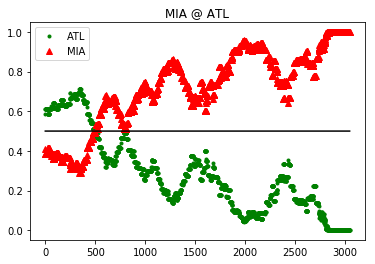

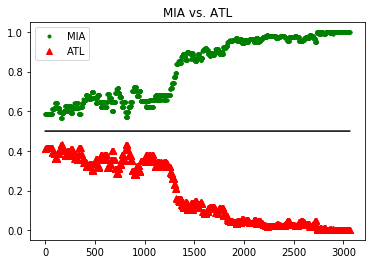

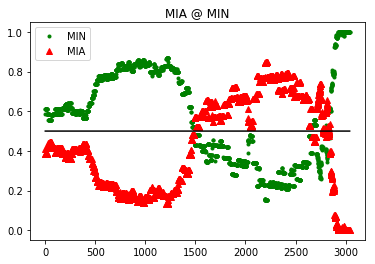

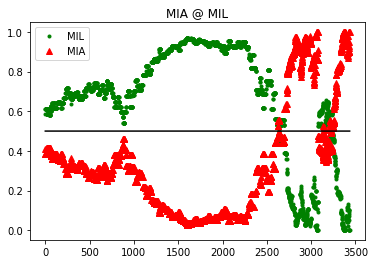

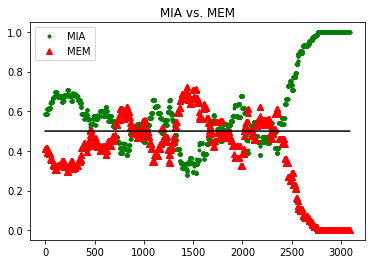

In [65]:
generate_win_probability_team('MIA')

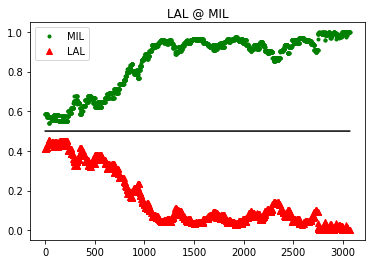

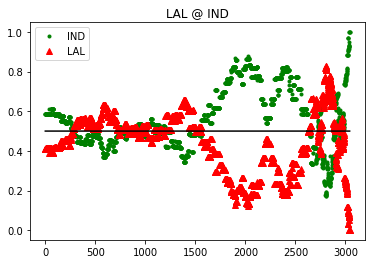

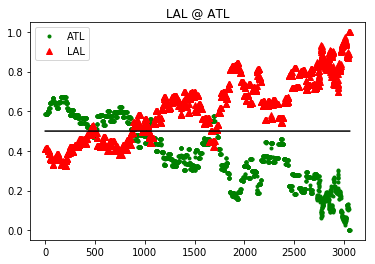

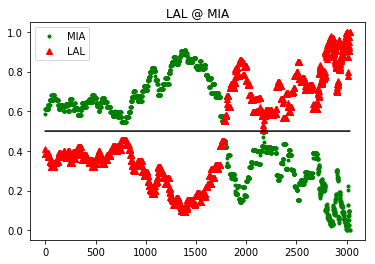

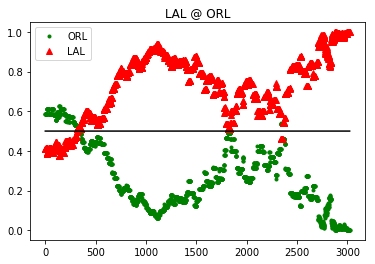

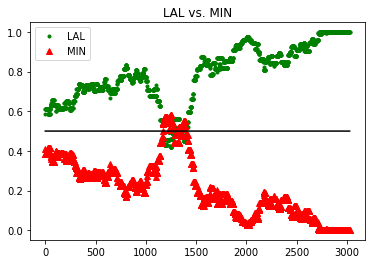

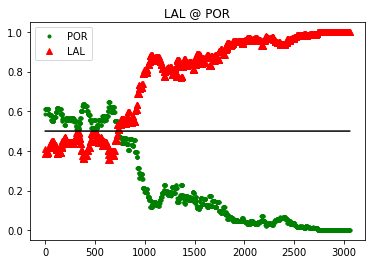

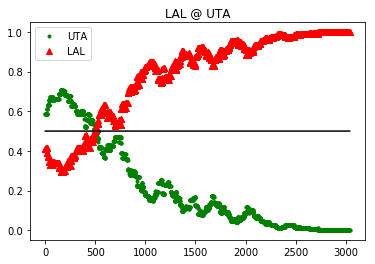

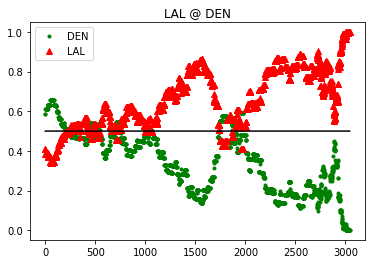

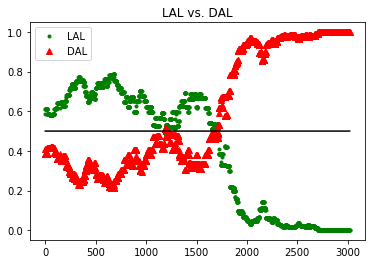

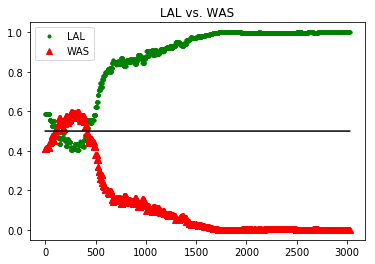

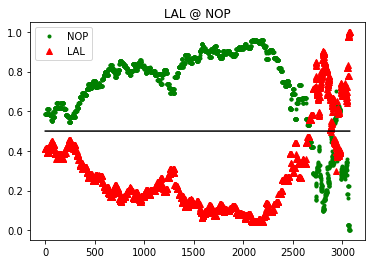

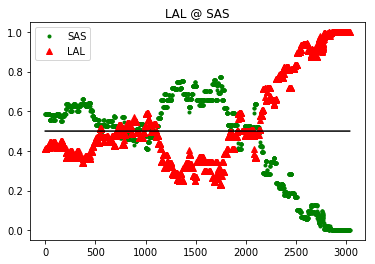

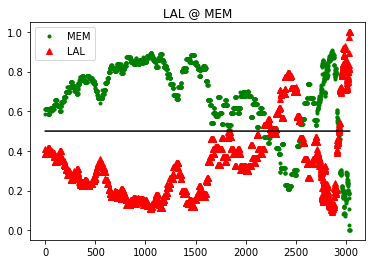

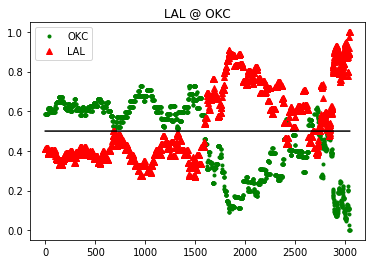

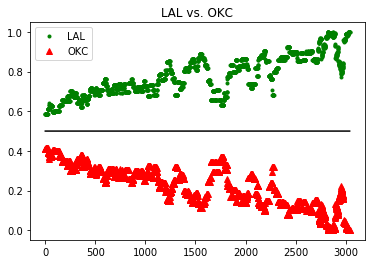

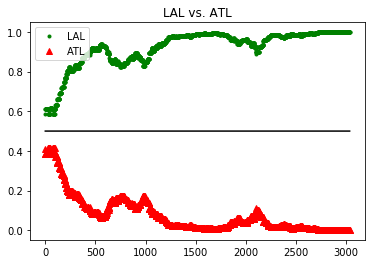

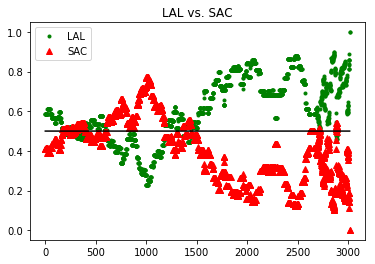

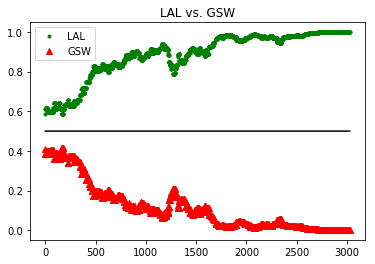

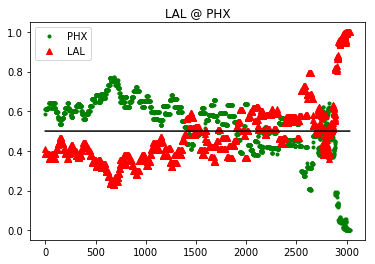

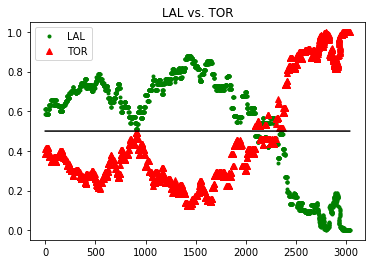

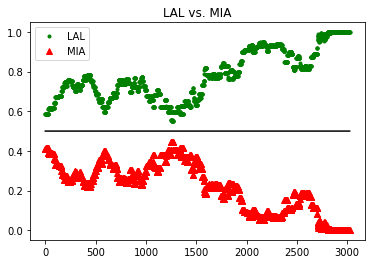

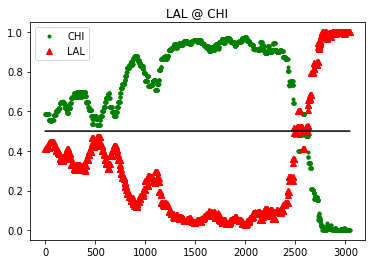

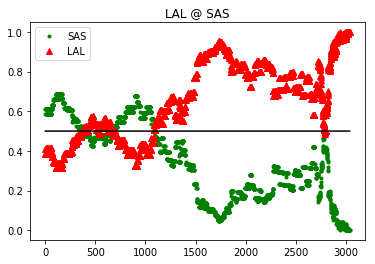

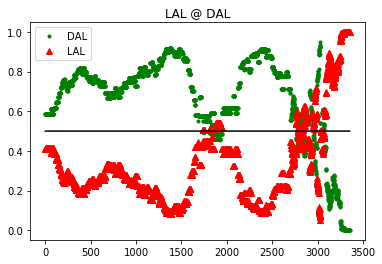

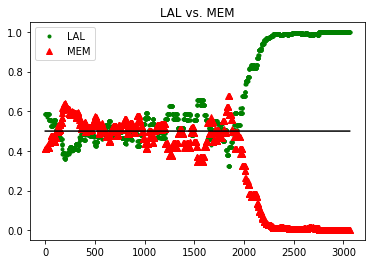

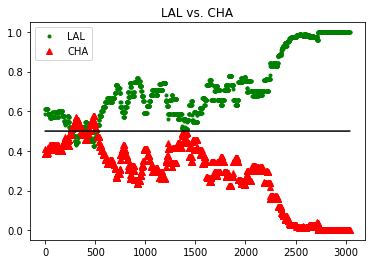

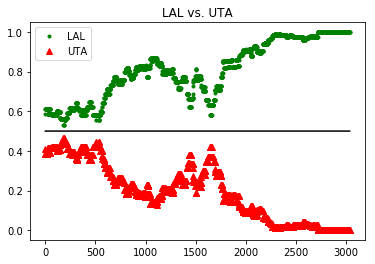

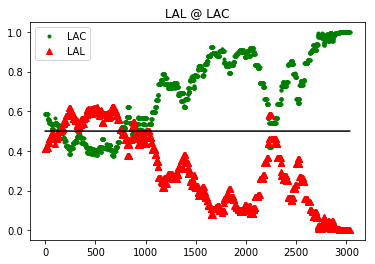

In [66]:
generate_win_probability_team('LAL')

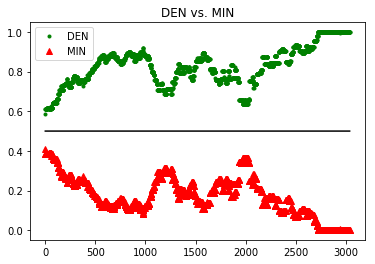

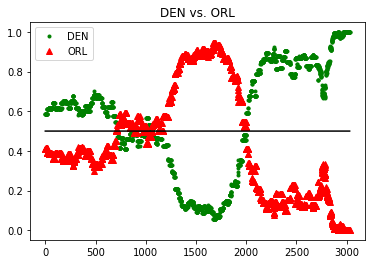

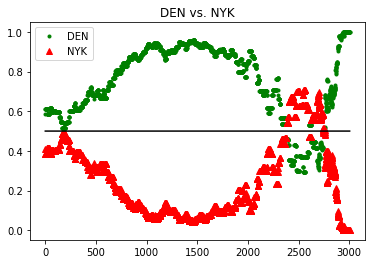

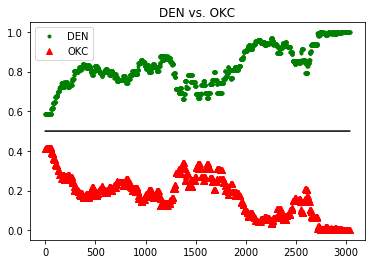

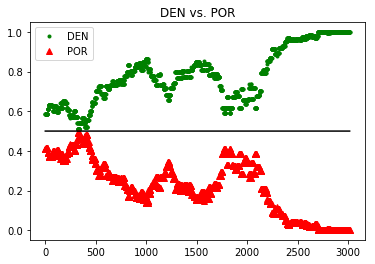

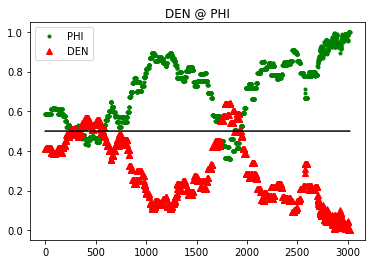

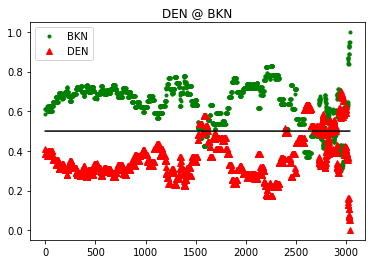

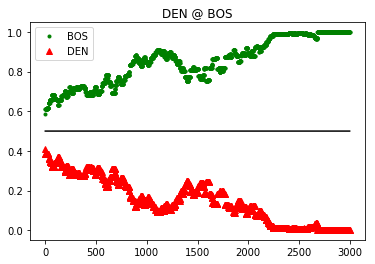

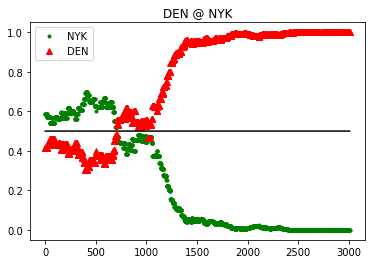

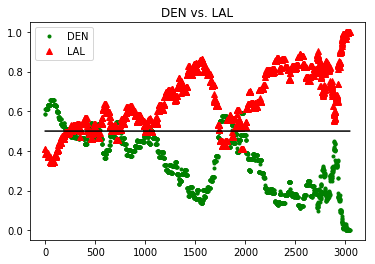

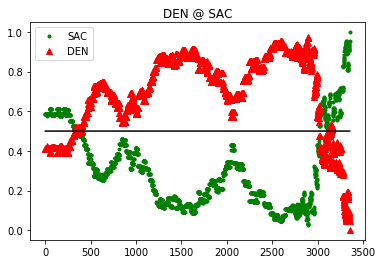

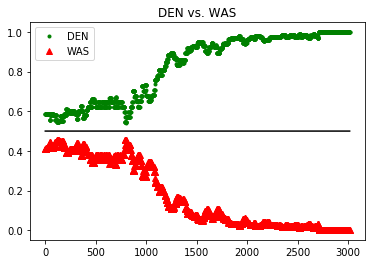

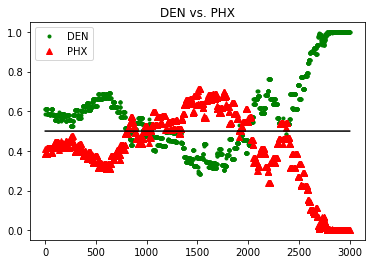

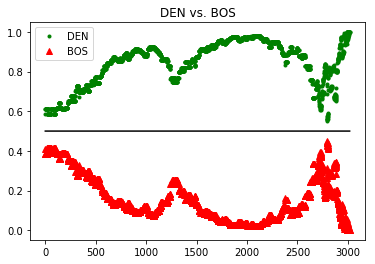

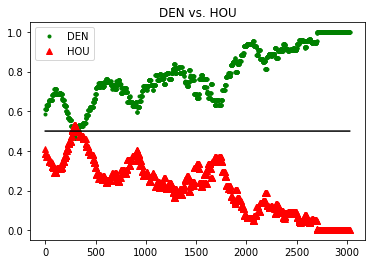

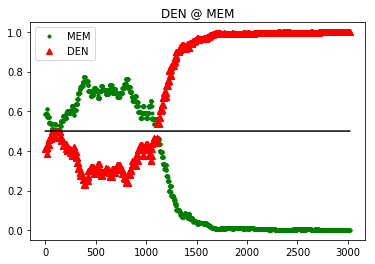

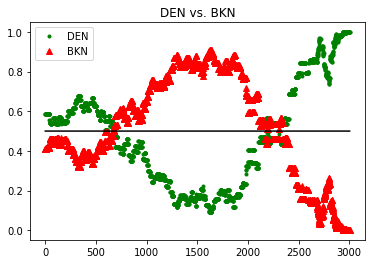

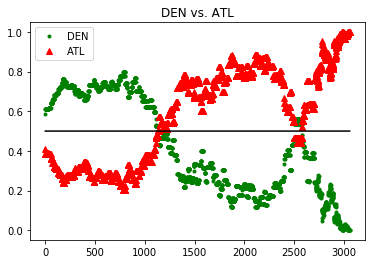

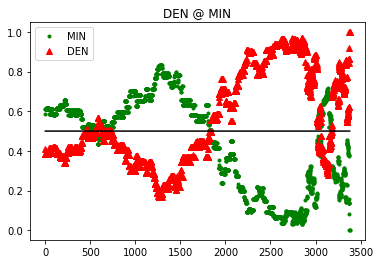

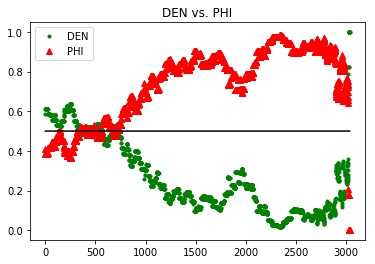

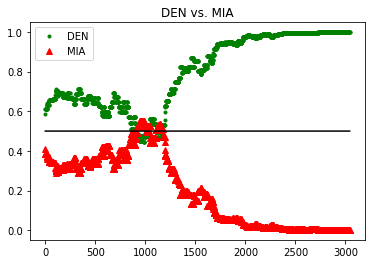

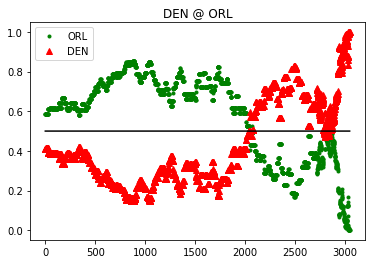

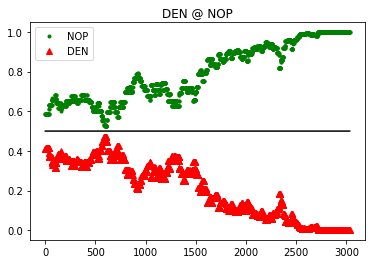

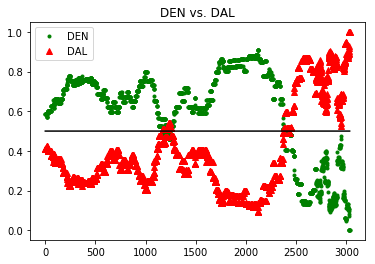

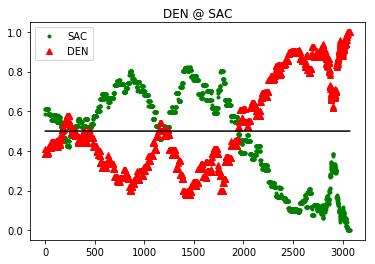

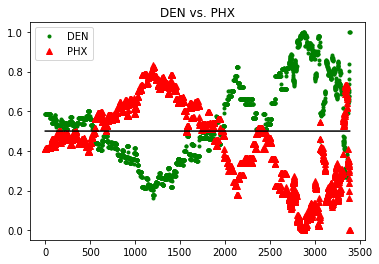

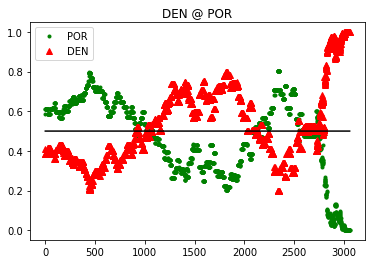

In [67]:
generate_win_probability_team('DEN')

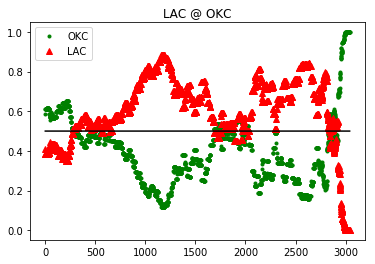

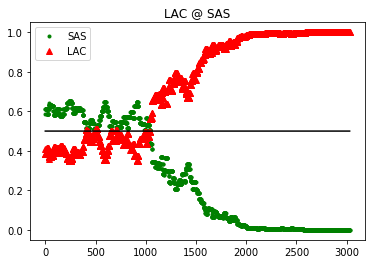

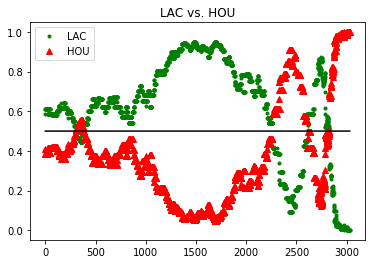

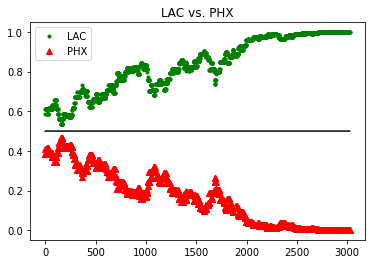

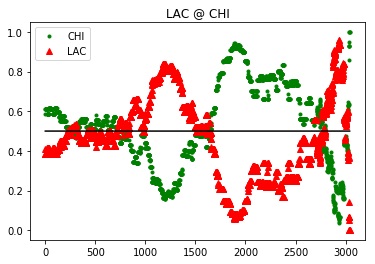

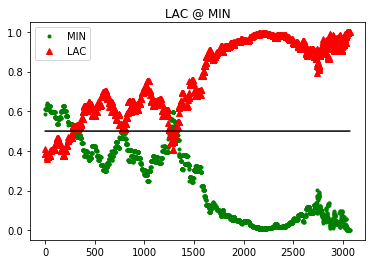

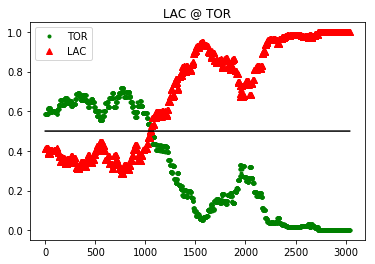

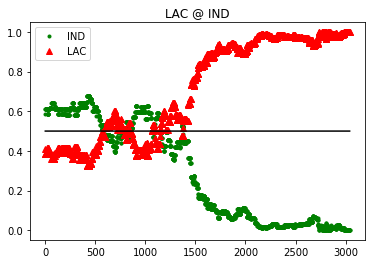

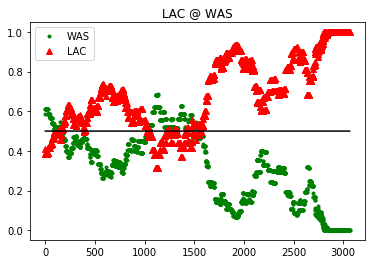

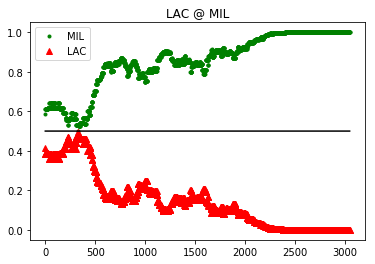

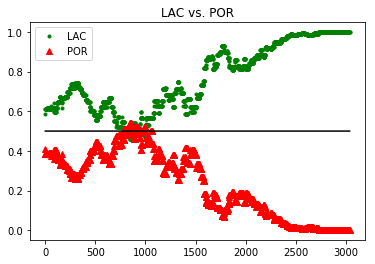

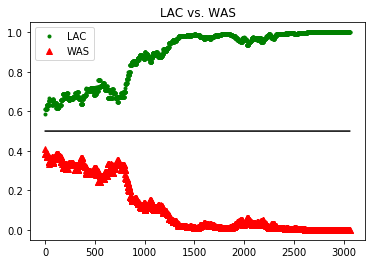

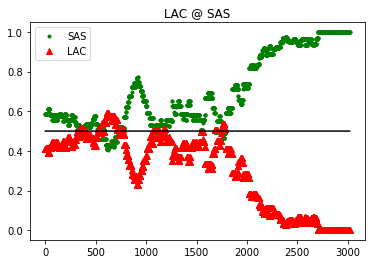

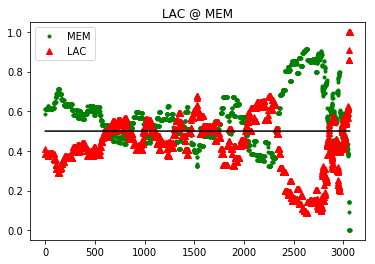

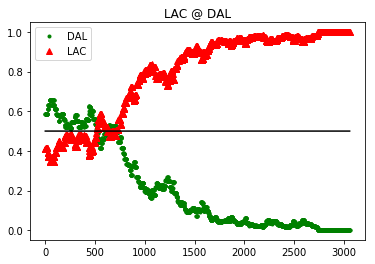

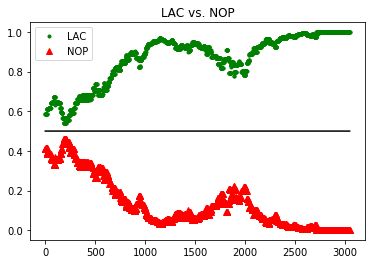

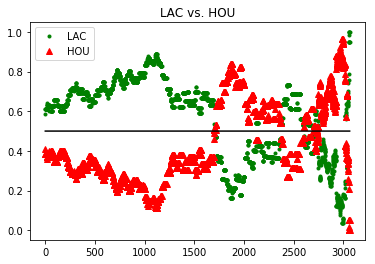

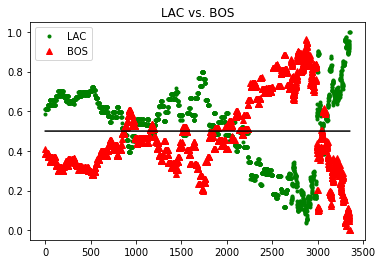

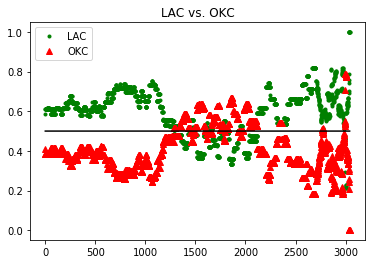

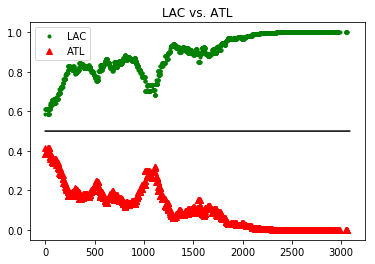

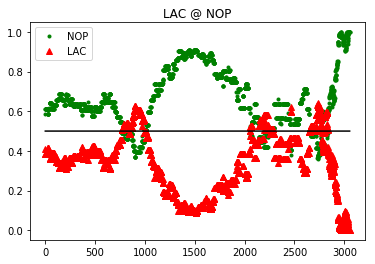

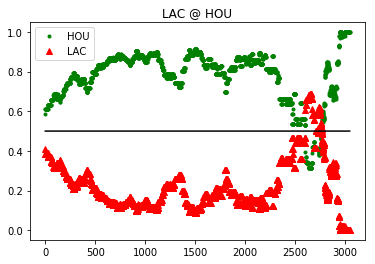

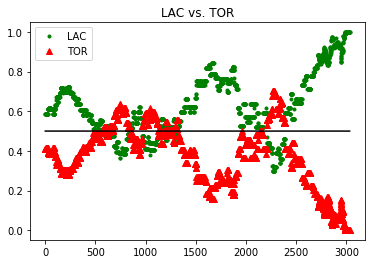

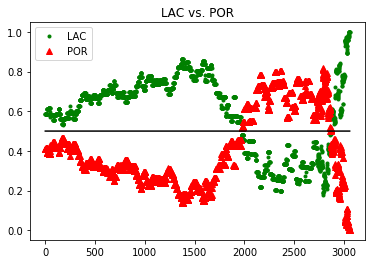

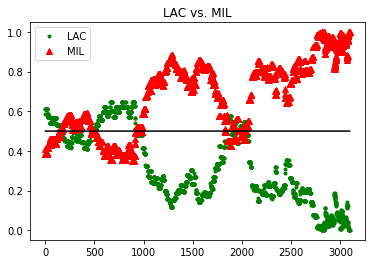

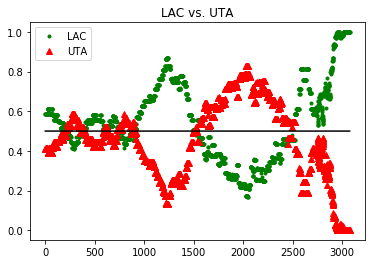

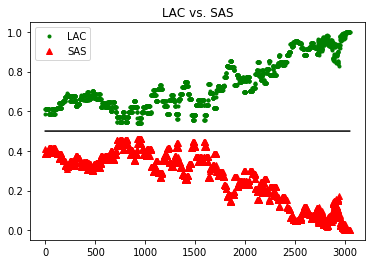

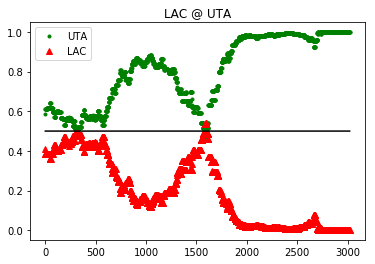

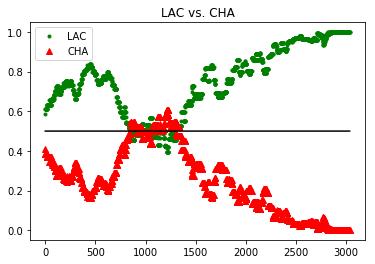

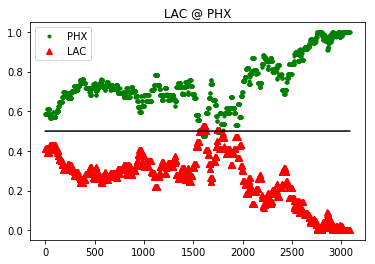

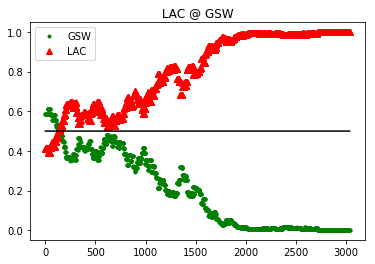

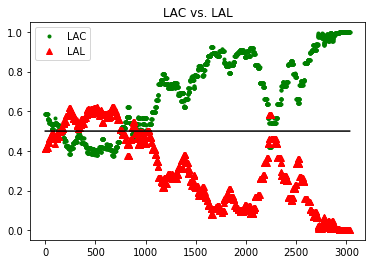

In [68]:
generate_win_probability_team('LAC')

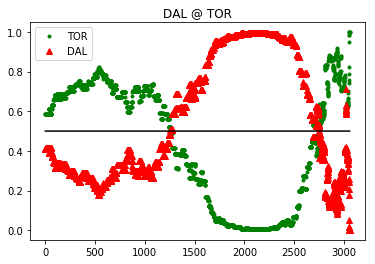

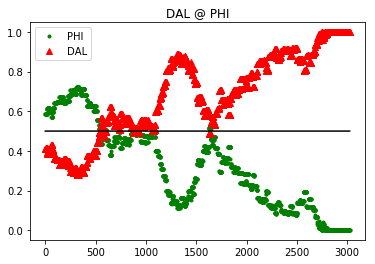

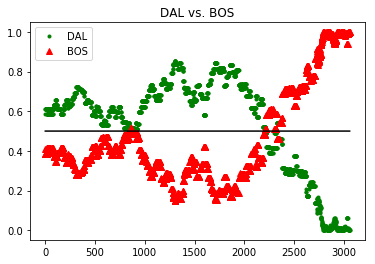

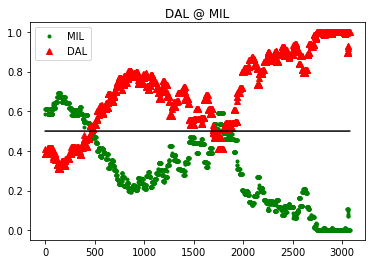

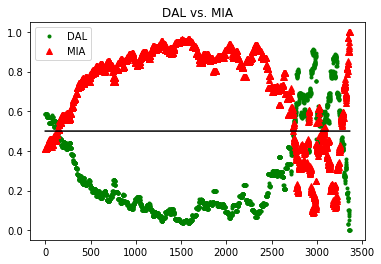

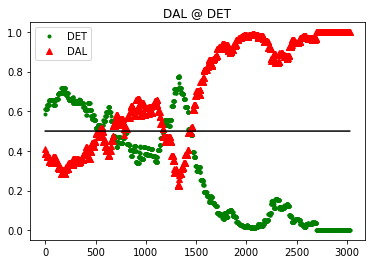

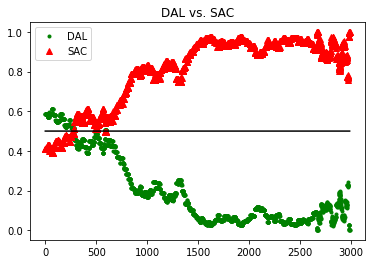

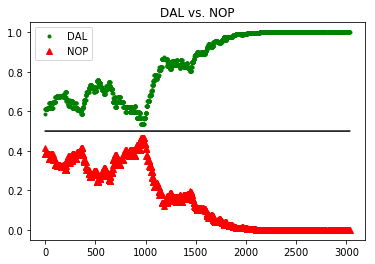

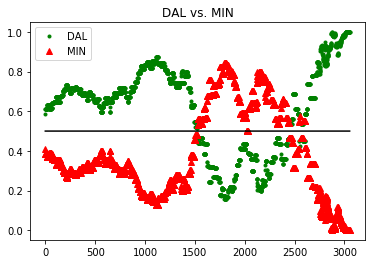

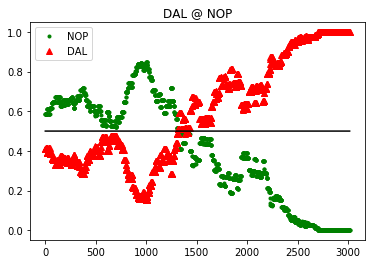

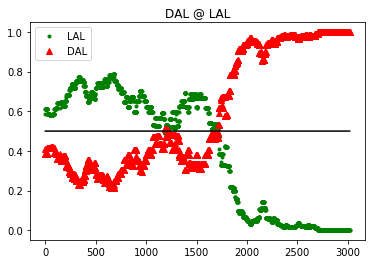

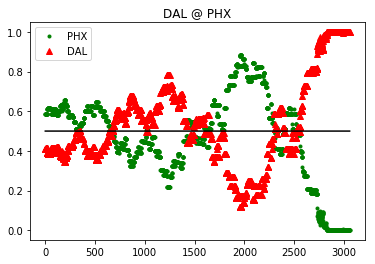

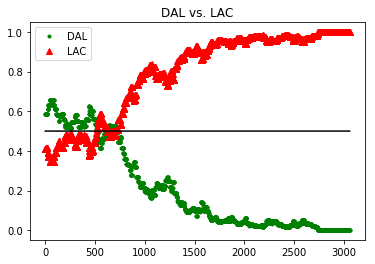

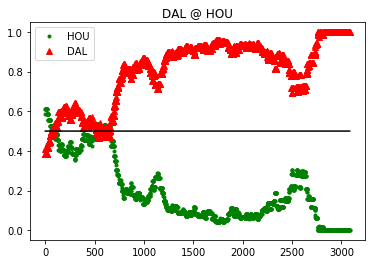

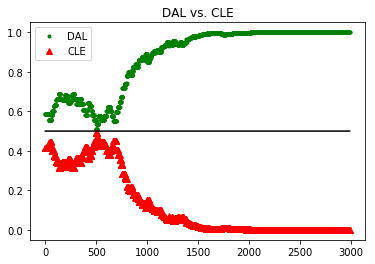

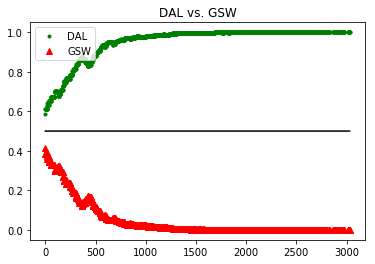

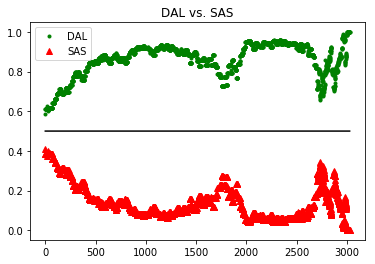

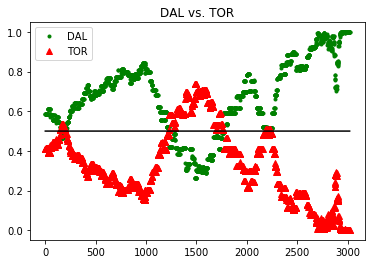

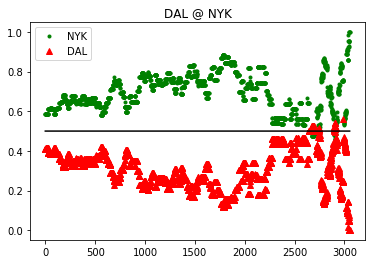

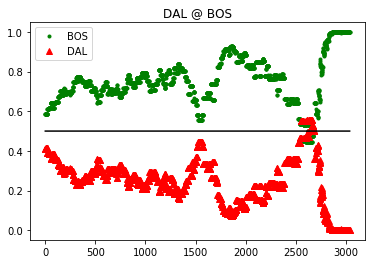

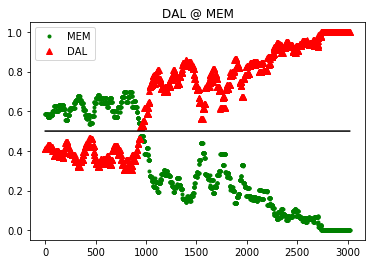

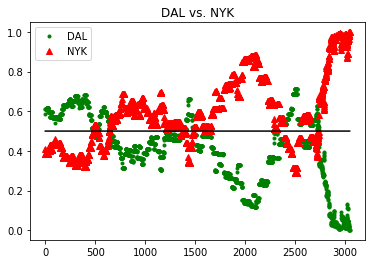

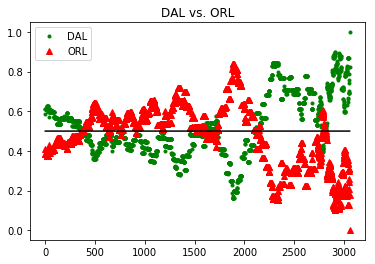

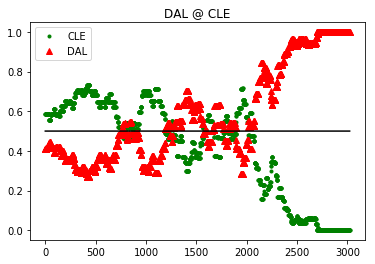

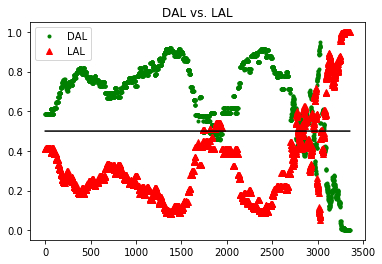

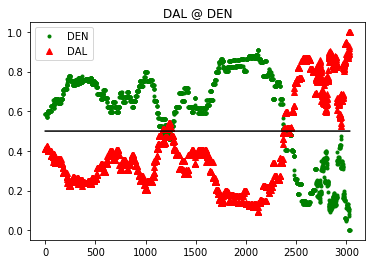

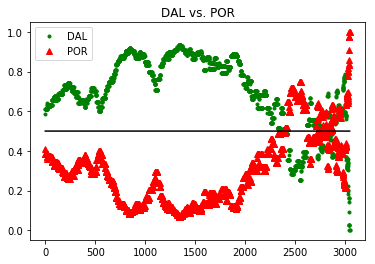

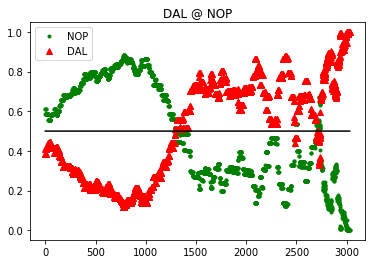

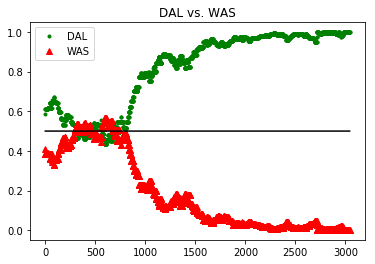

In [69]:
generate_win_probability_team('DAL')

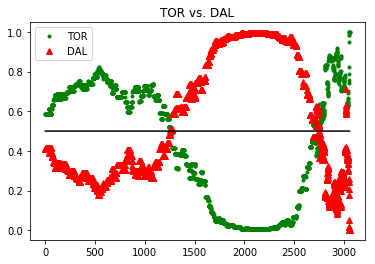

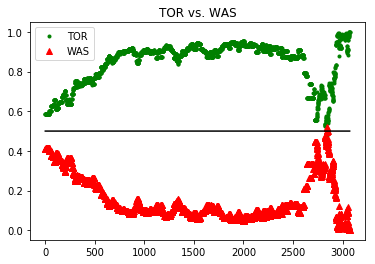

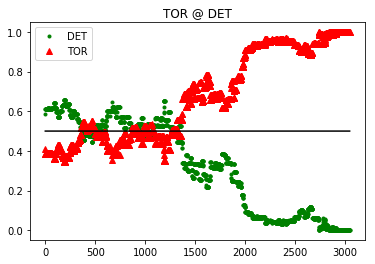

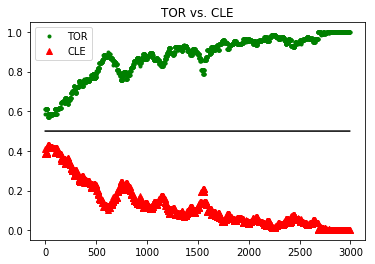

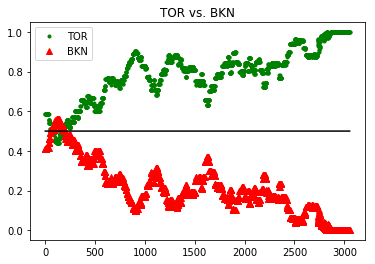

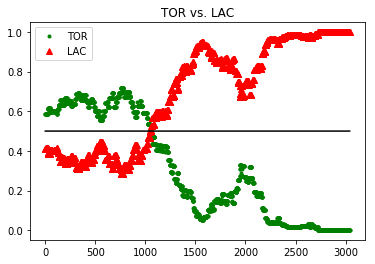

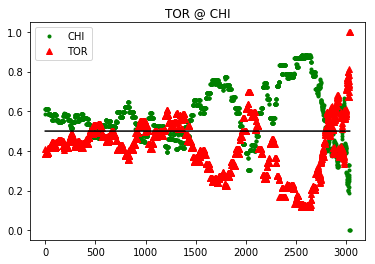

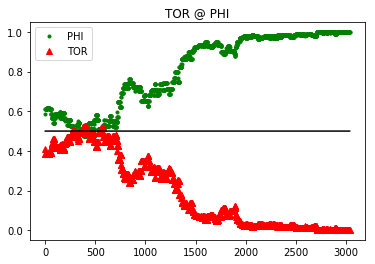

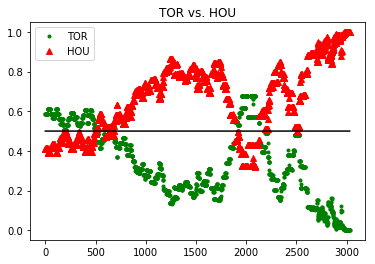

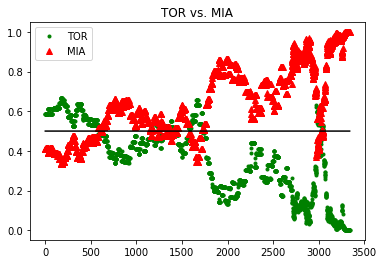

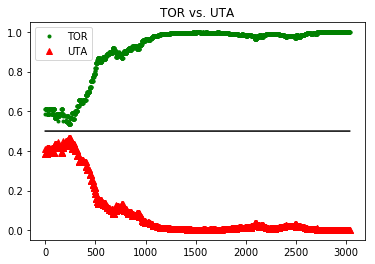

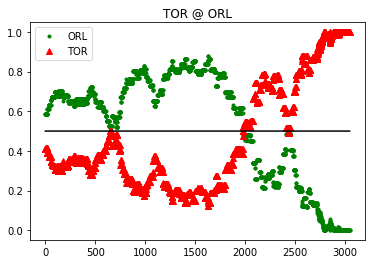

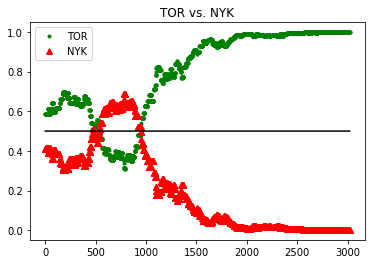

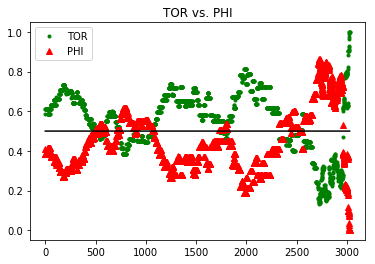

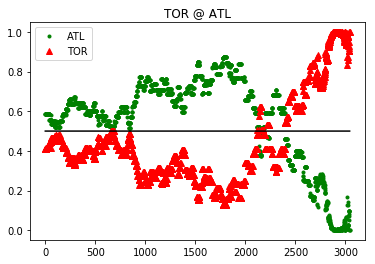

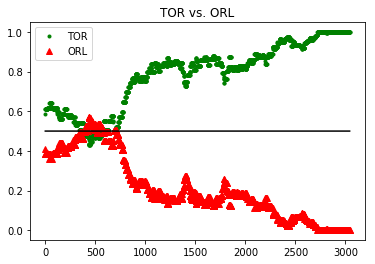

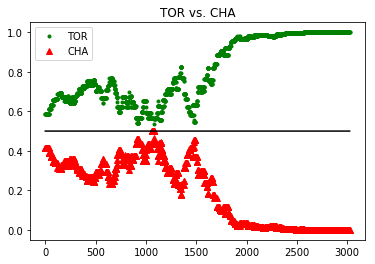

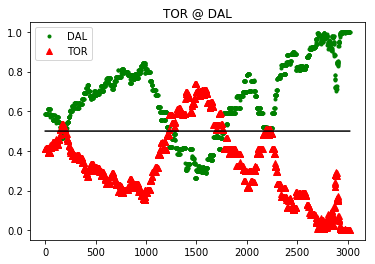

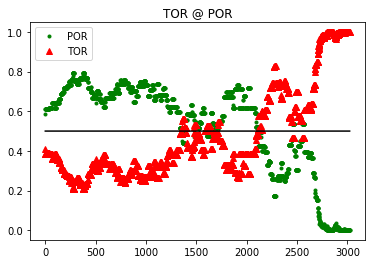

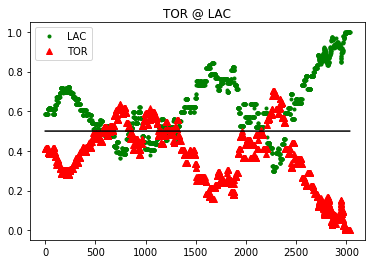

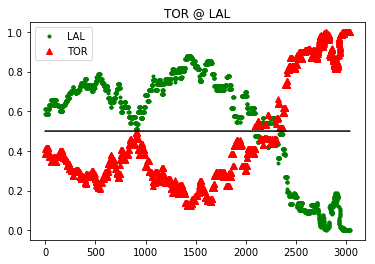

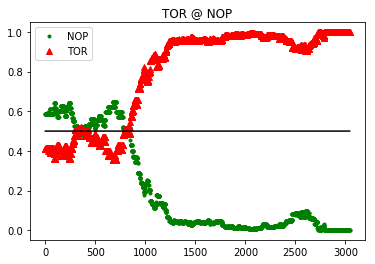

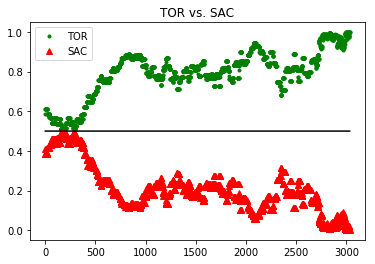

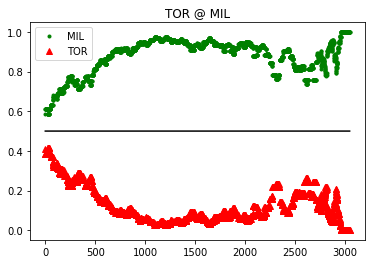

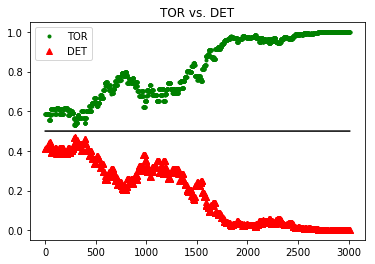

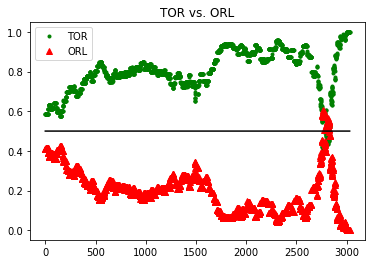

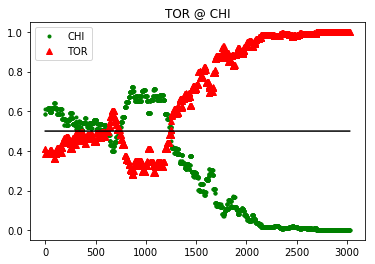

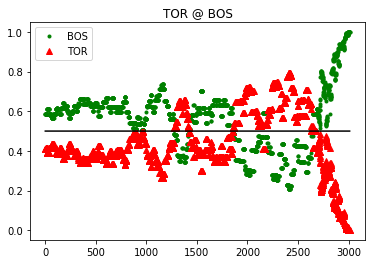

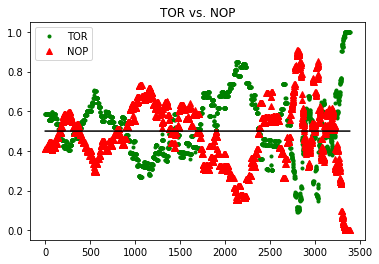

In [70]:
generate_win_probability_team('TOR')

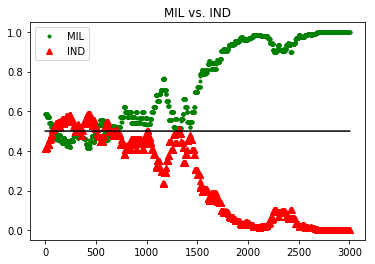

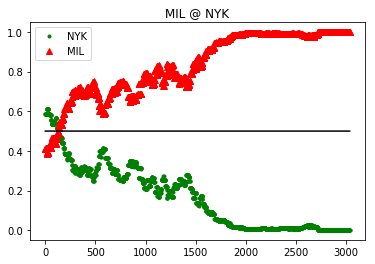

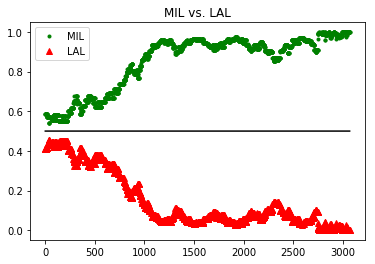

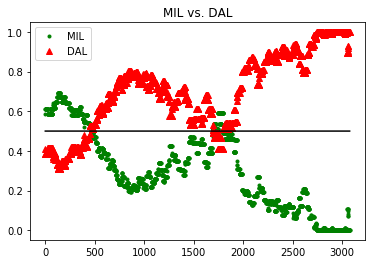

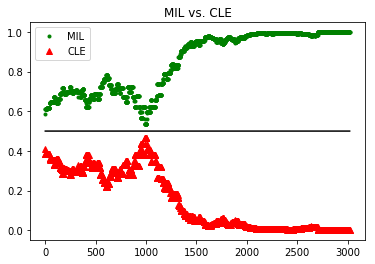

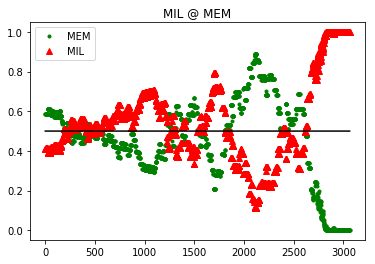

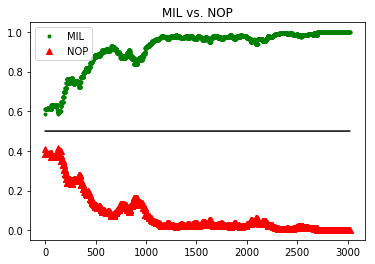

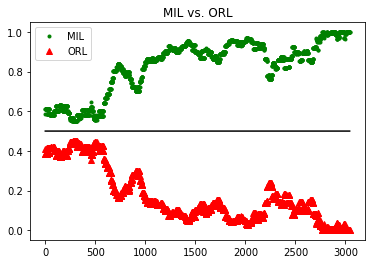

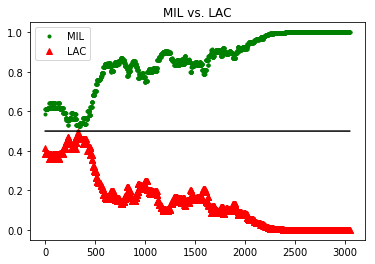

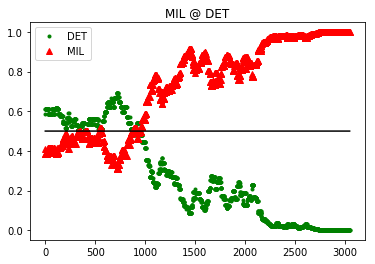

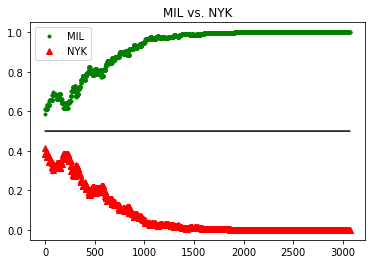

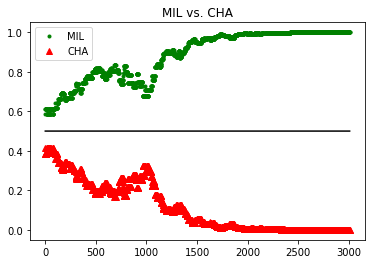

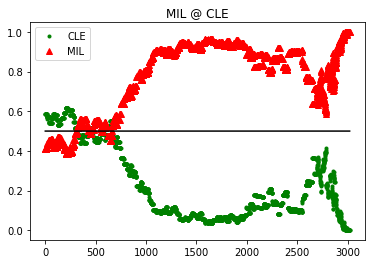

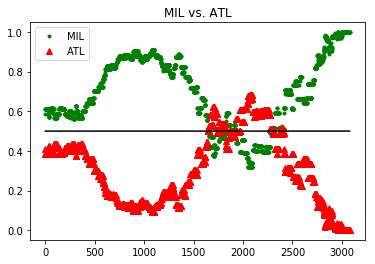

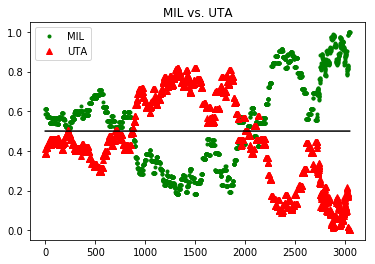

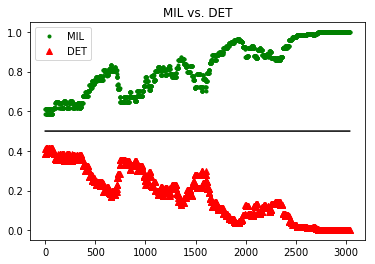

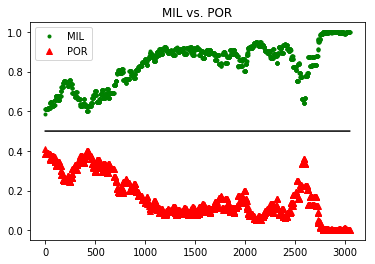

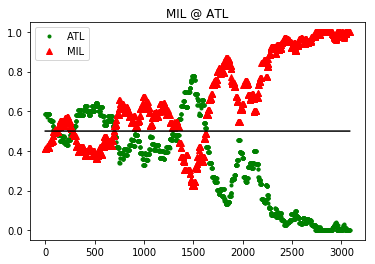

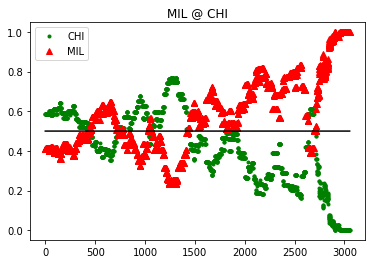

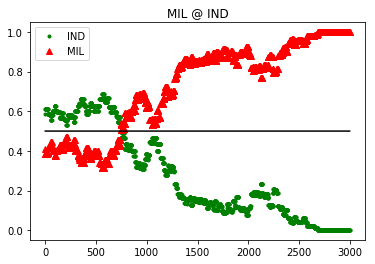

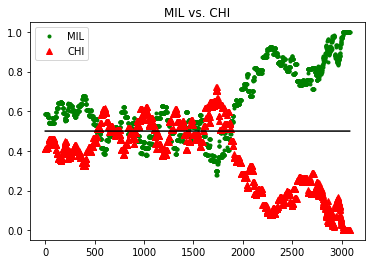

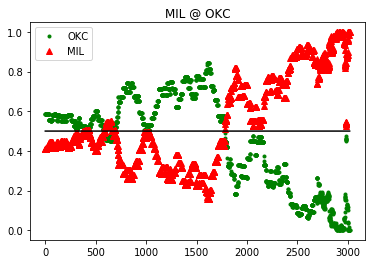

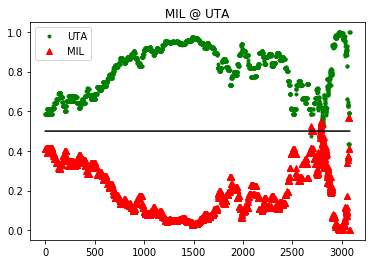

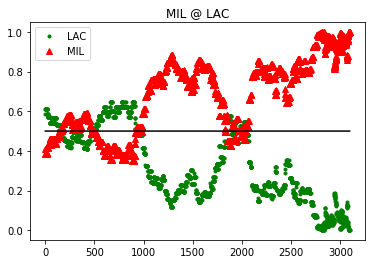

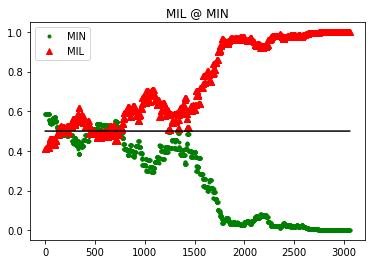

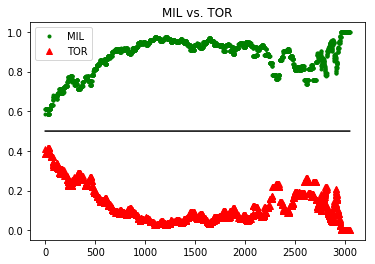

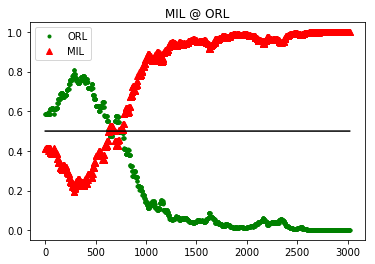

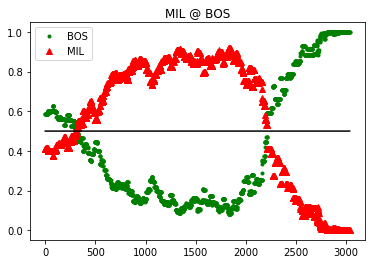

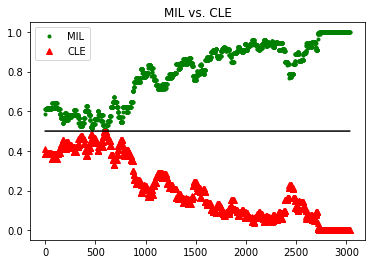

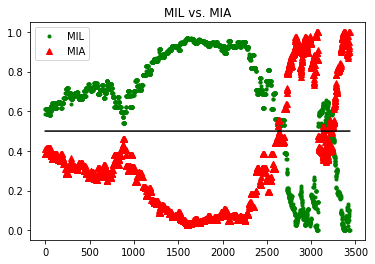

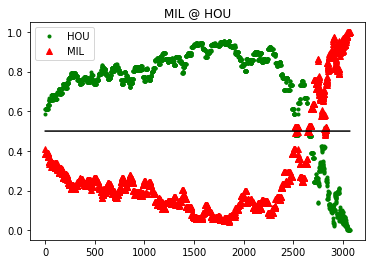

In [71]:
generate_win_probability_team('MIL')

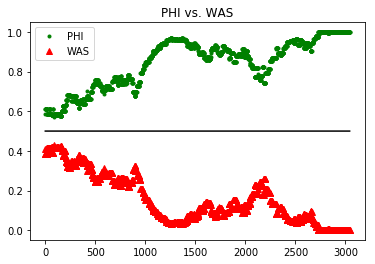

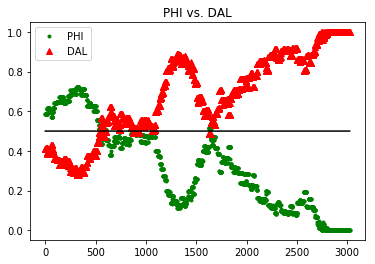

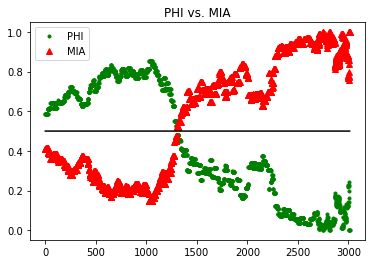

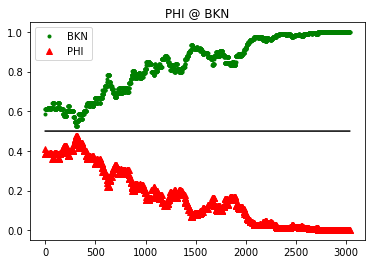

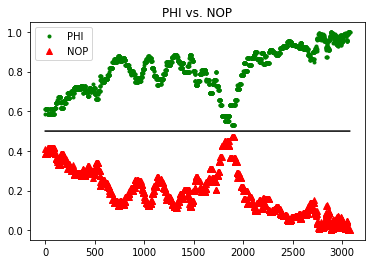

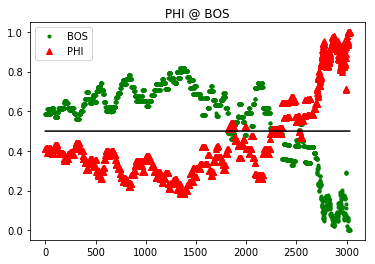

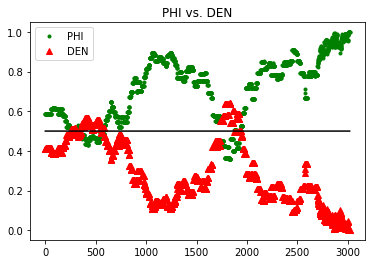

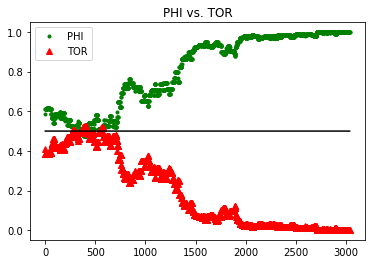

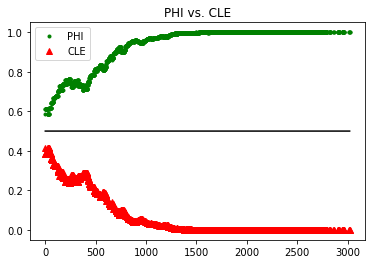

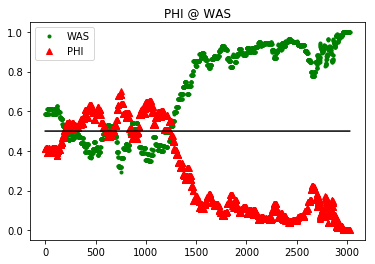

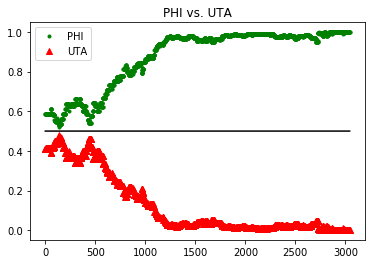

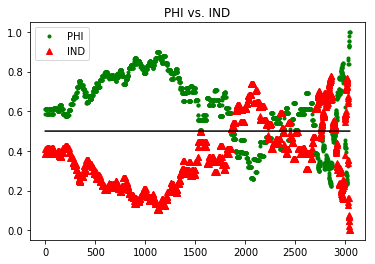

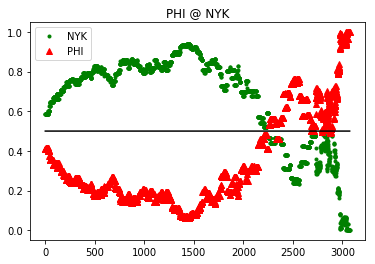

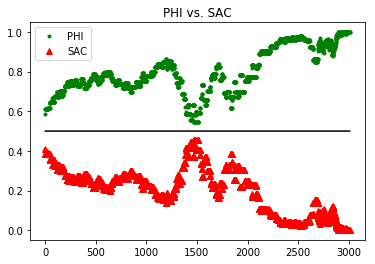

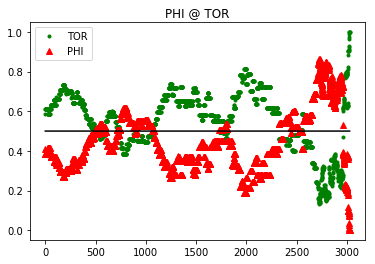

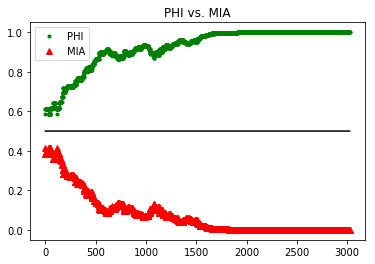

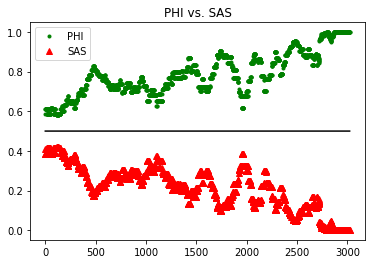

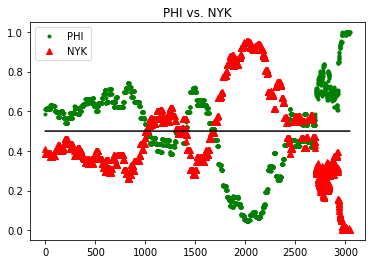

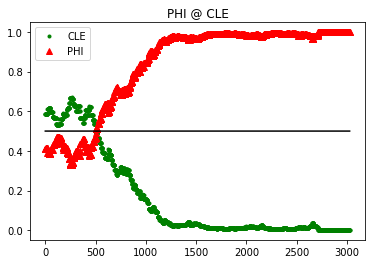

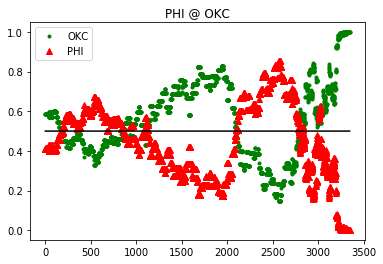

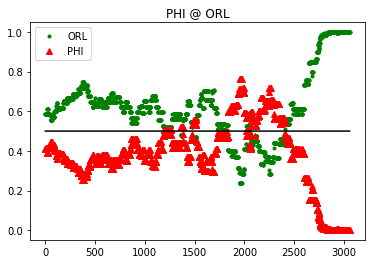

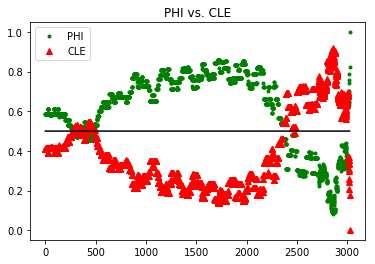

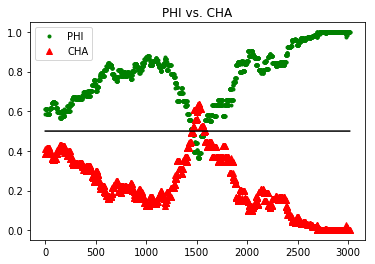

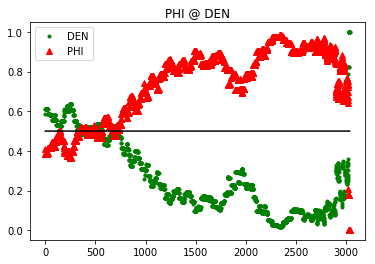

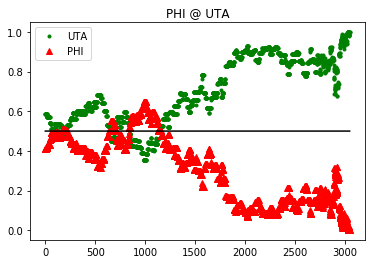

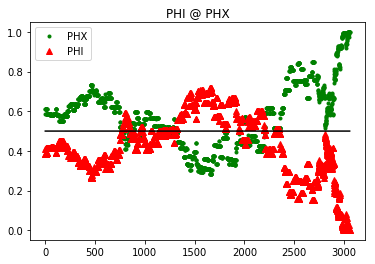

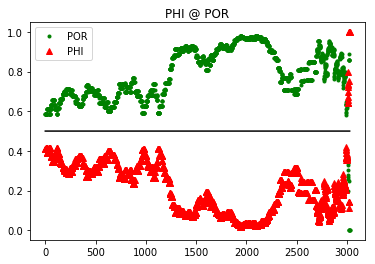

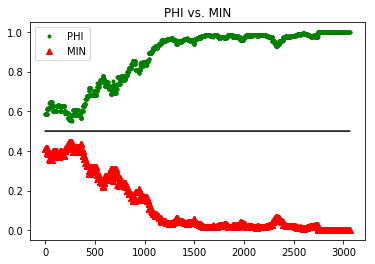

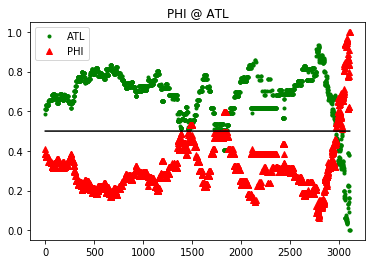

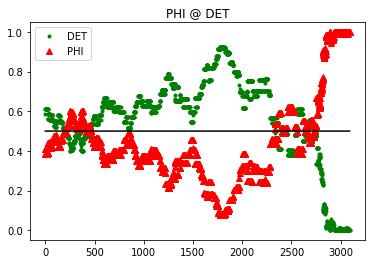

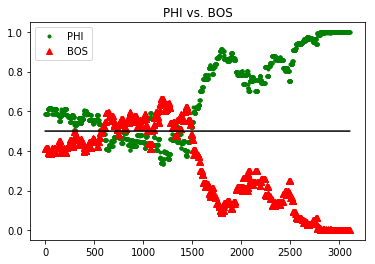

In [72]:
generate_win_probability_team('PHI')

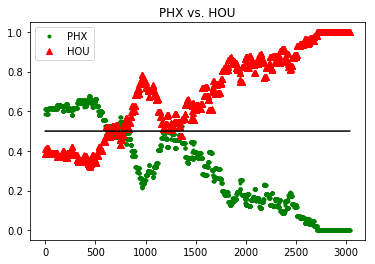

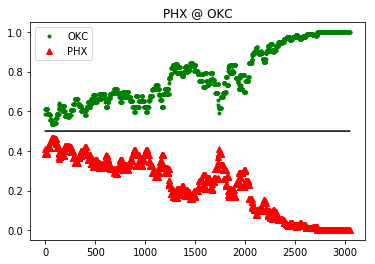

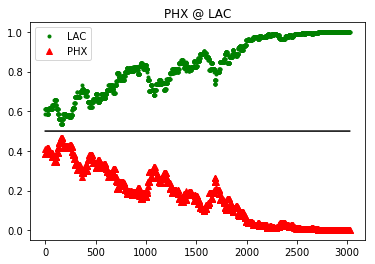

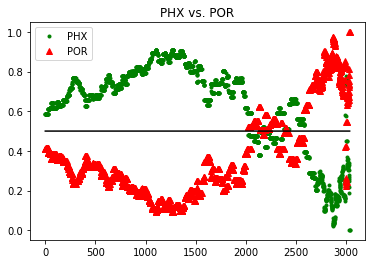

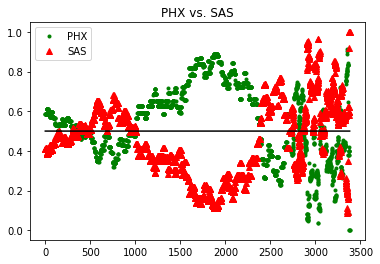

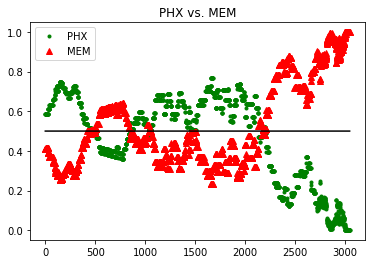

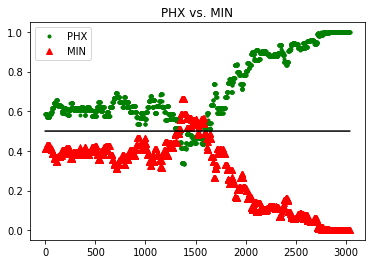

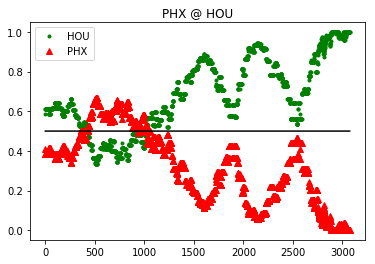

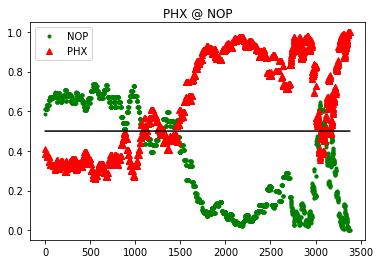

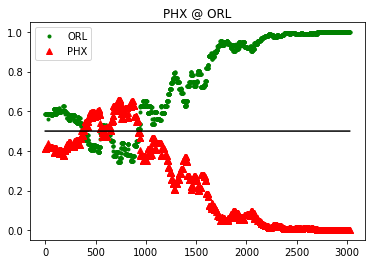

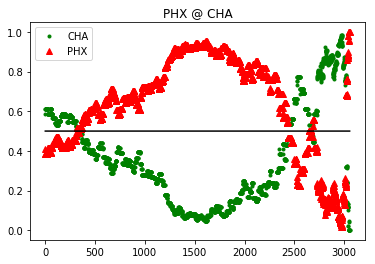

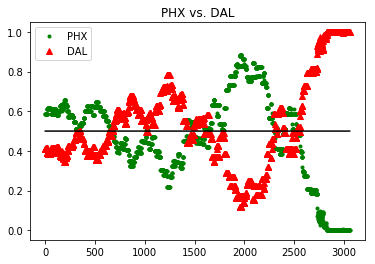

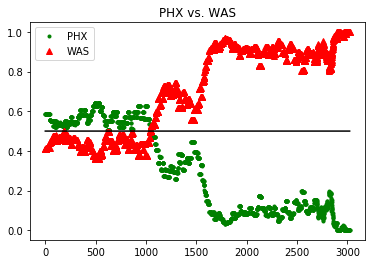

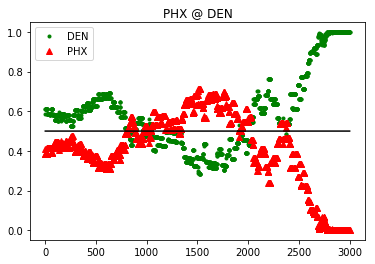

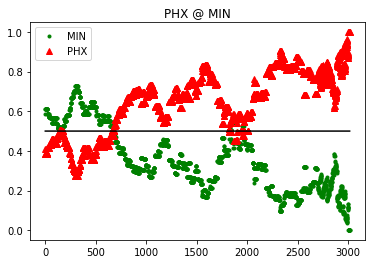

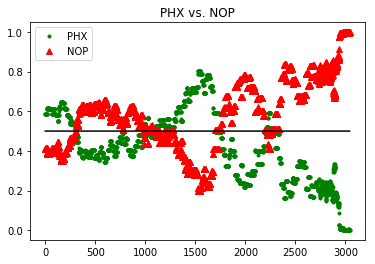

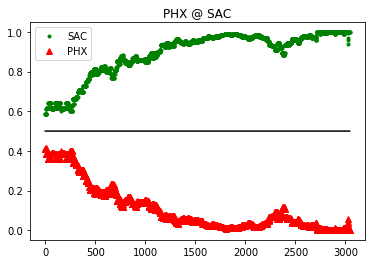

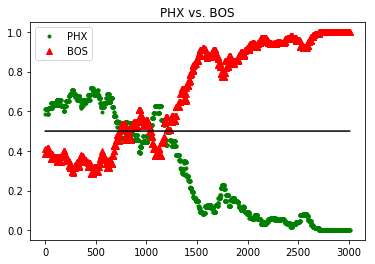

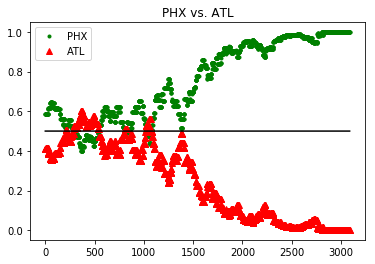

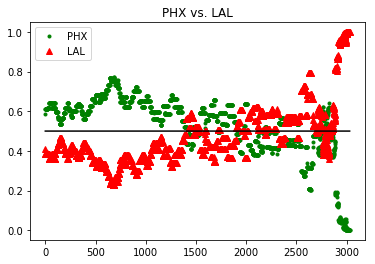

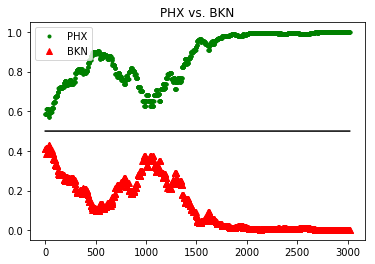

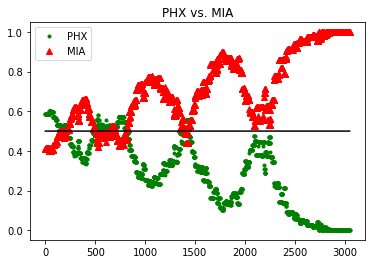

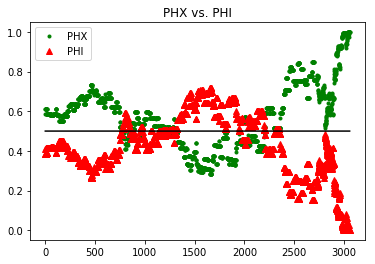

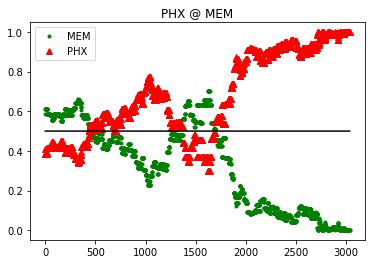

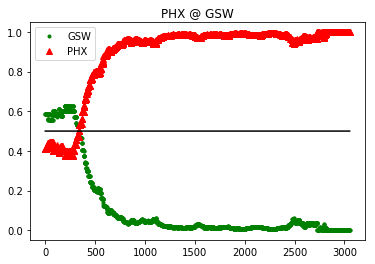

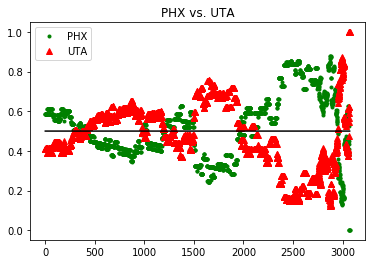

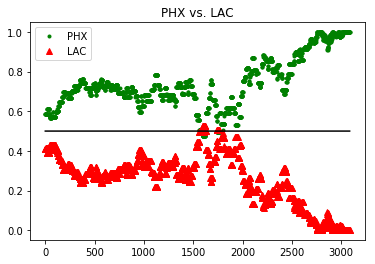

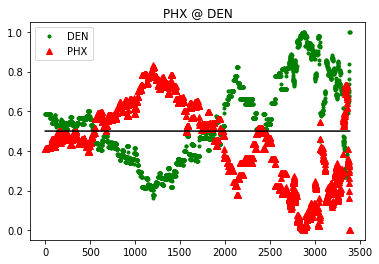

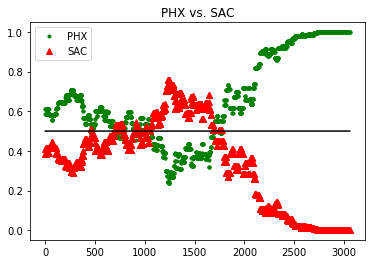

In [73]:
generate_win_probability_team('PHX')

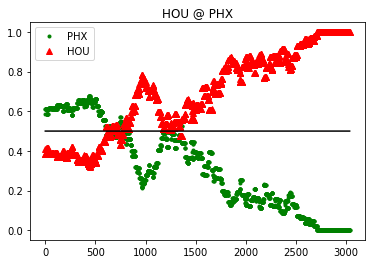

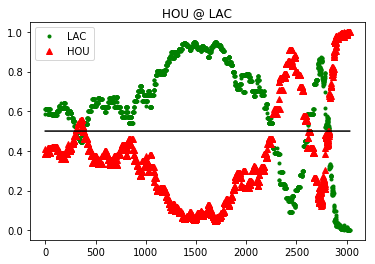

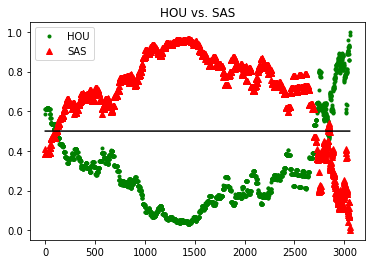

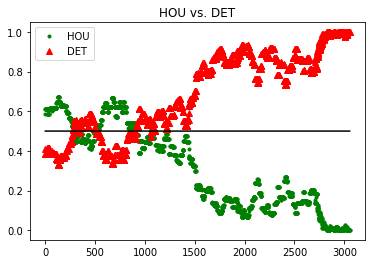

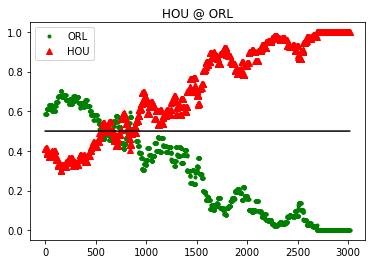

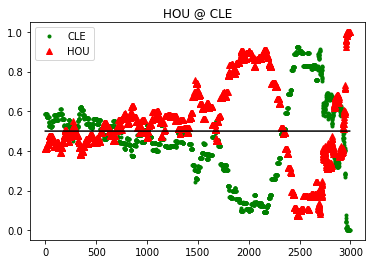

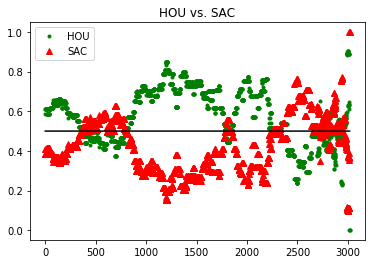

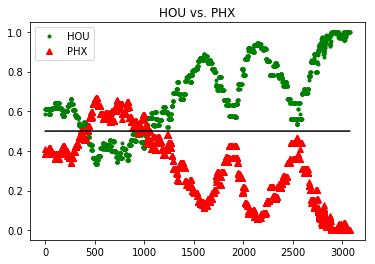

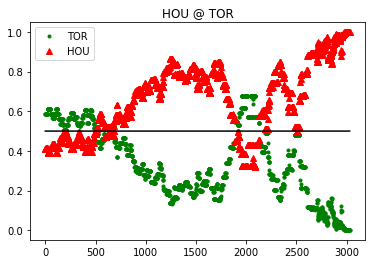

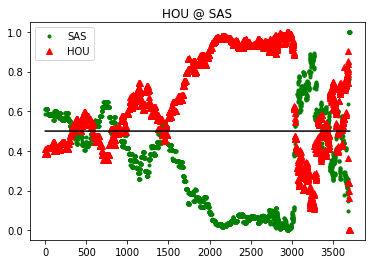

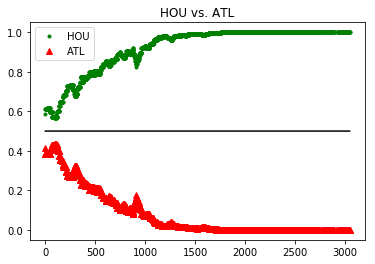

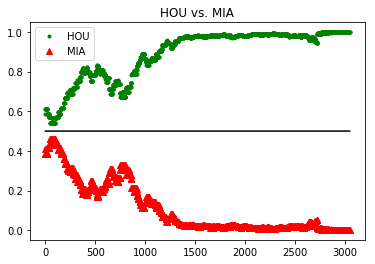

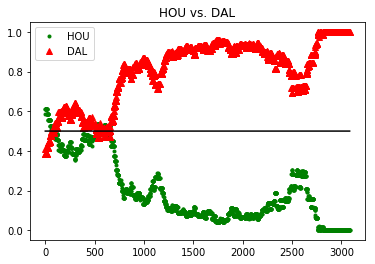

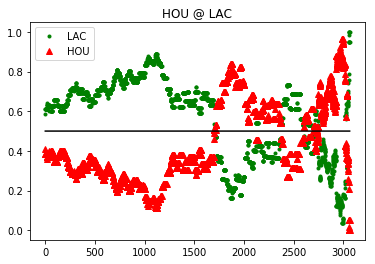

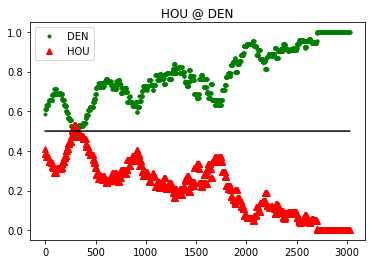

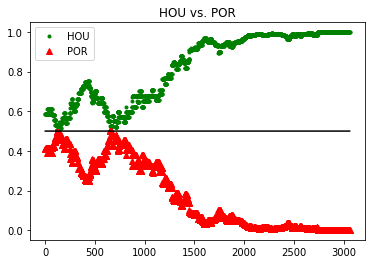

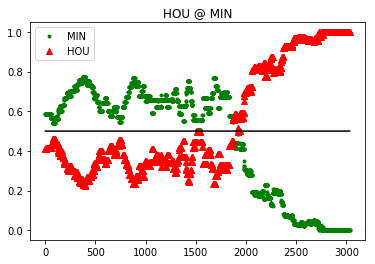

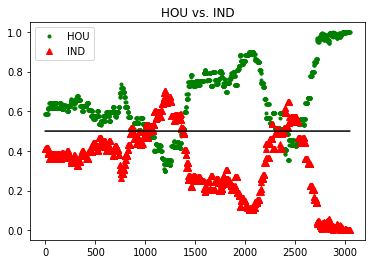

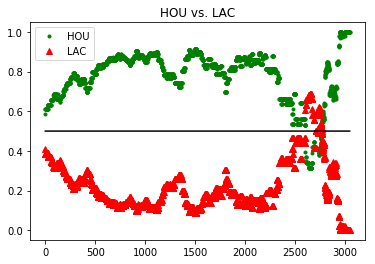

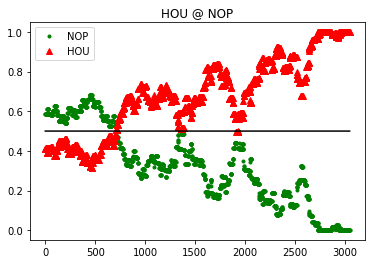

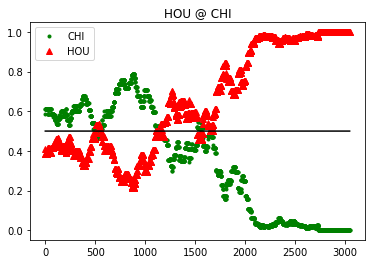

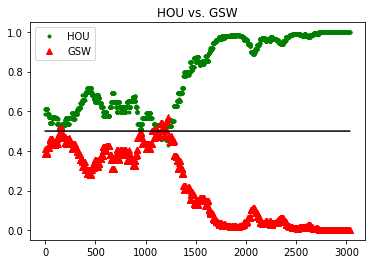

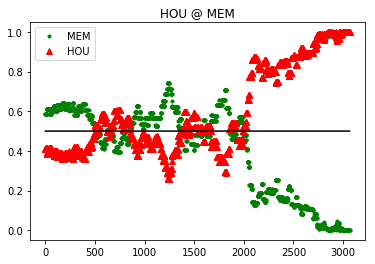

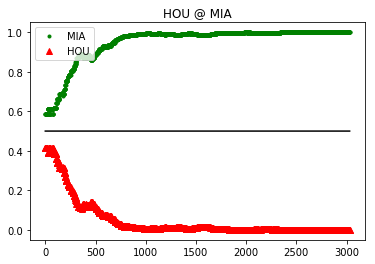

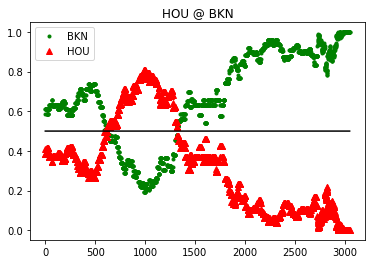

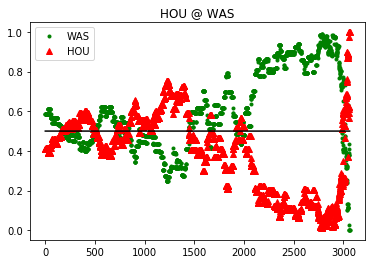

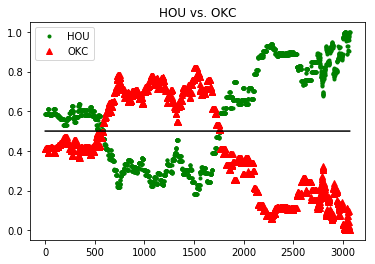

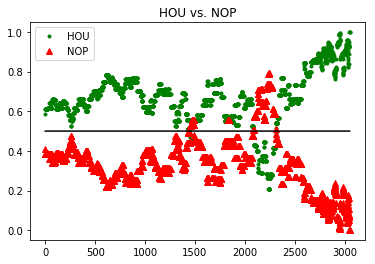

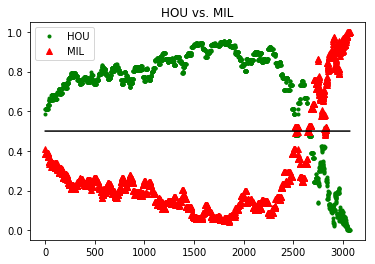

In [74]:
generate_win_probability_team('HOU')

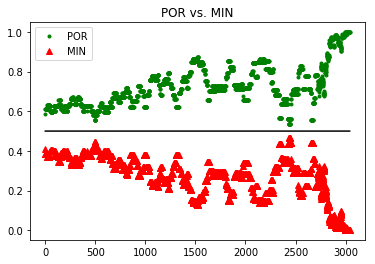

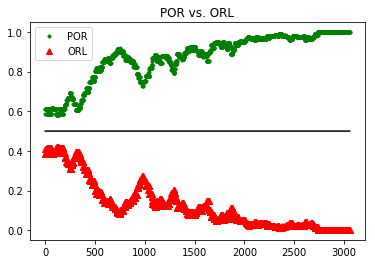

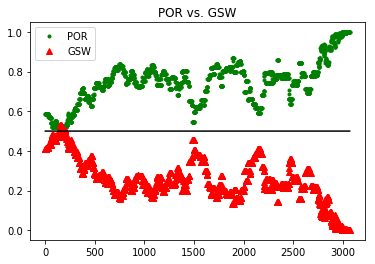

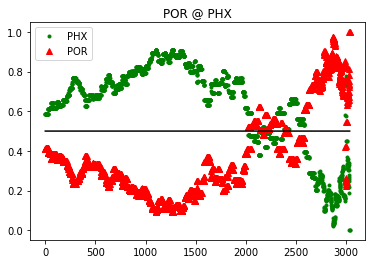

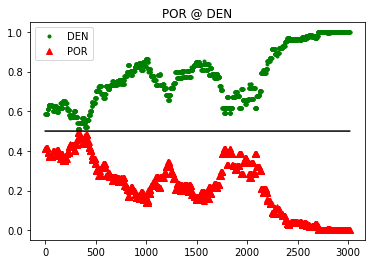

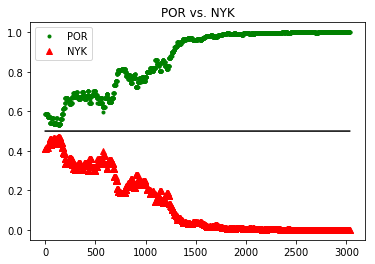

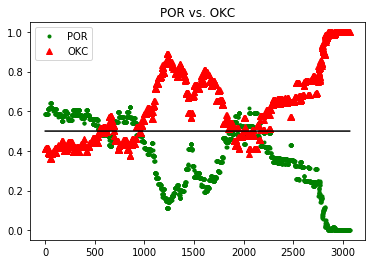

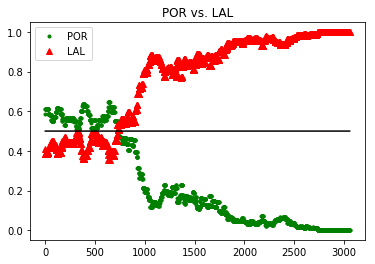

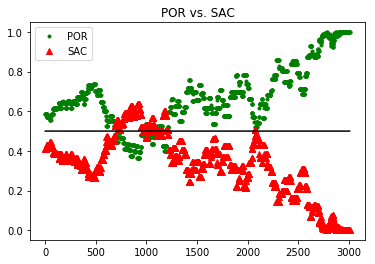

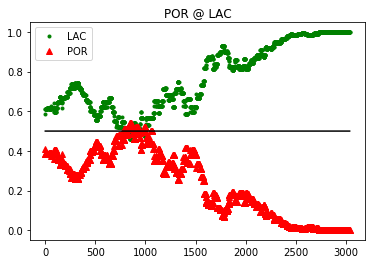

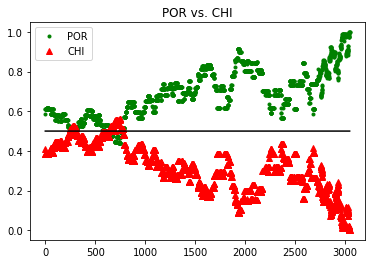

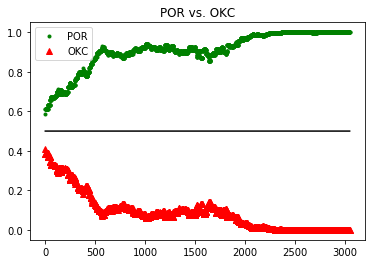

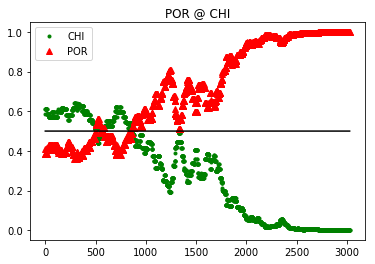

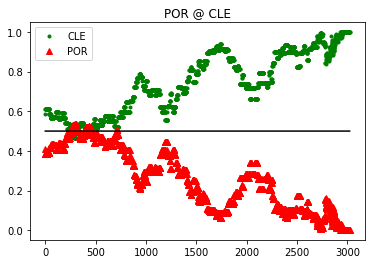

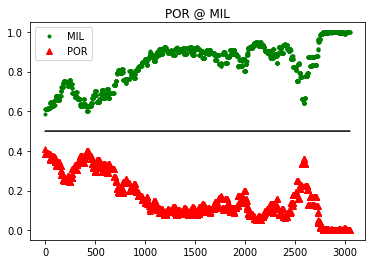

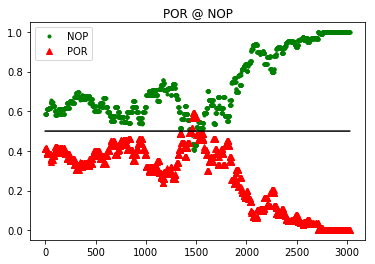

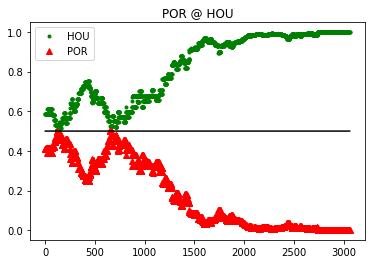

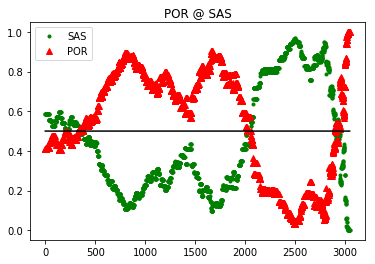

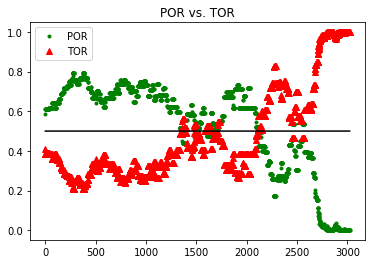

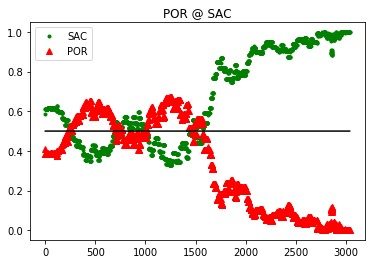

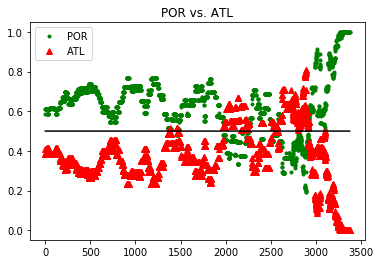

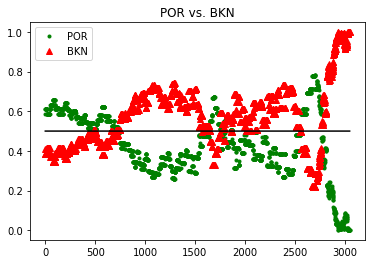

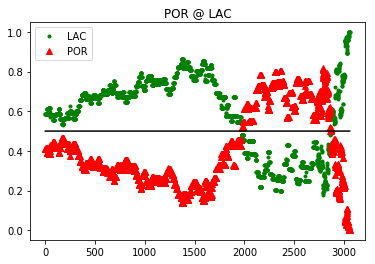

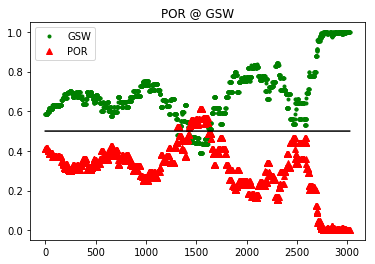

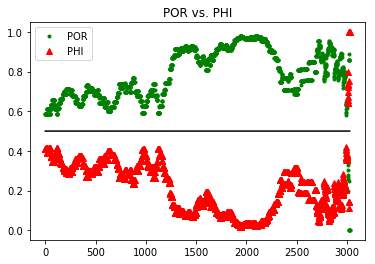

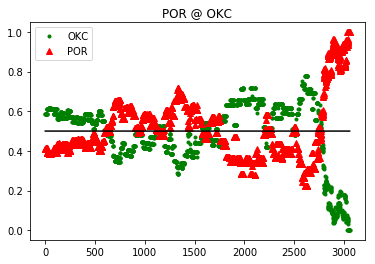

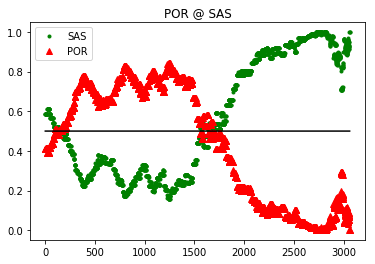

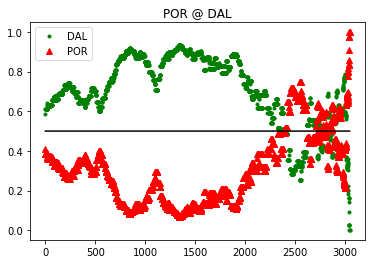

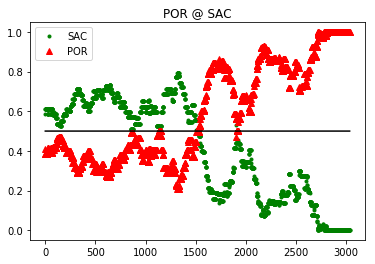

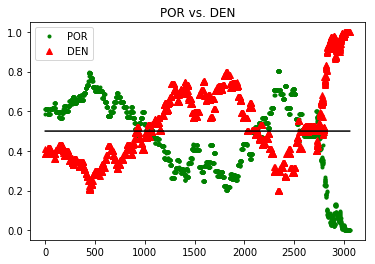

In [75]:
generate_win_probability_team('POR')

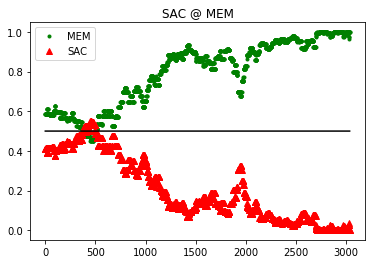

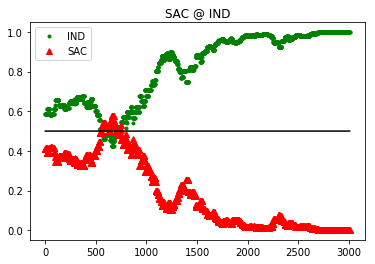

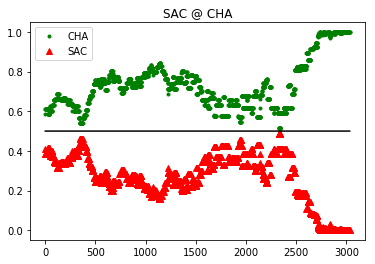

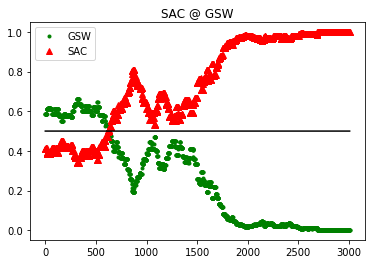

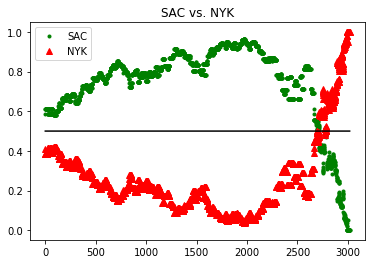

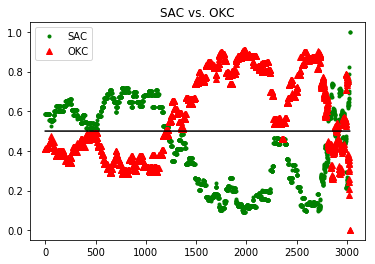

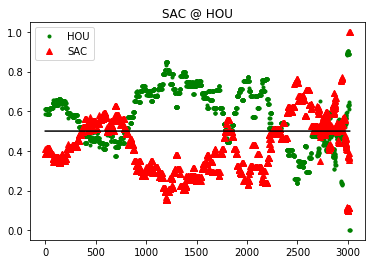

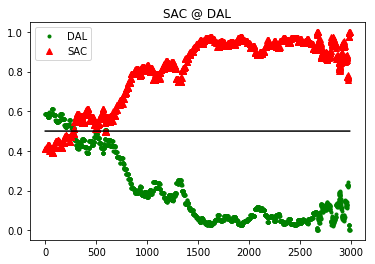

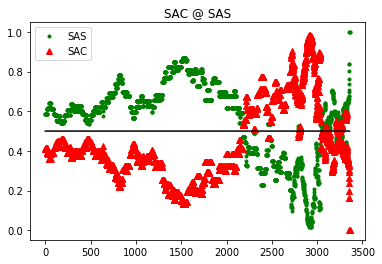

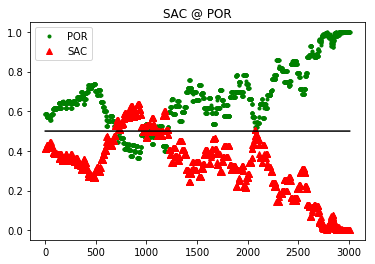

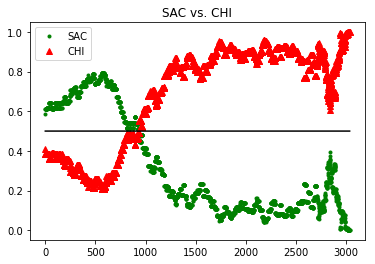

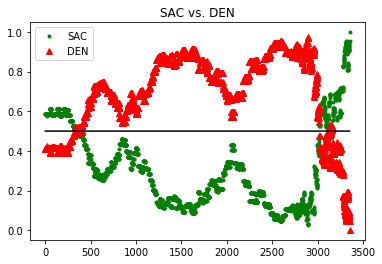

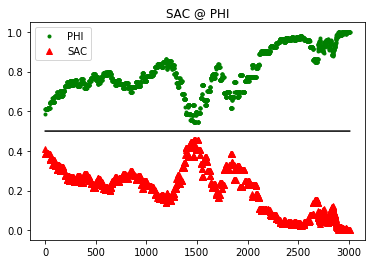

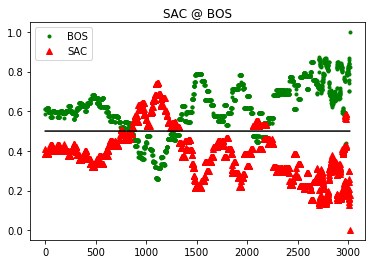

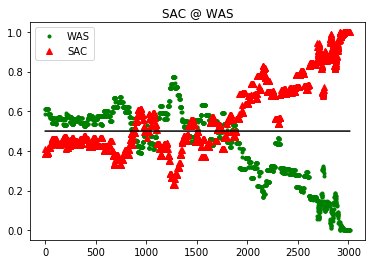

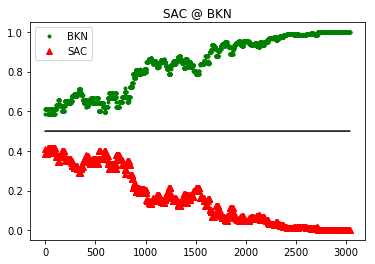

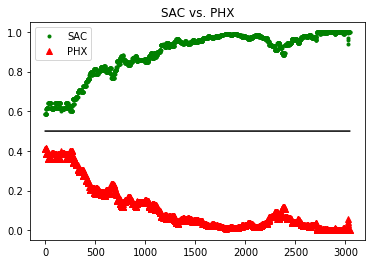

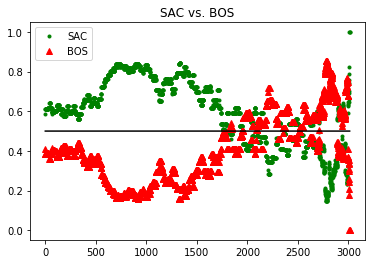

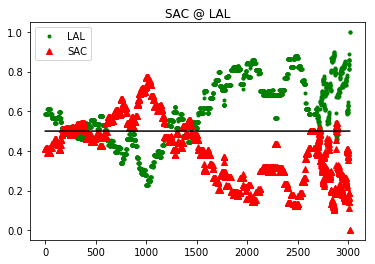

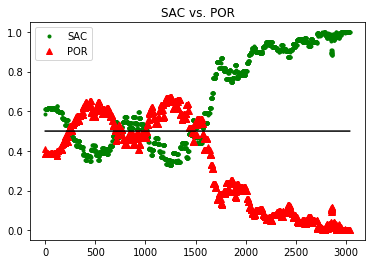

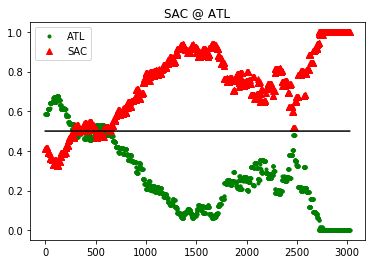

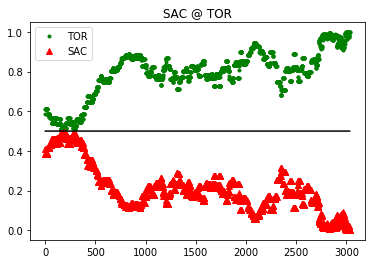

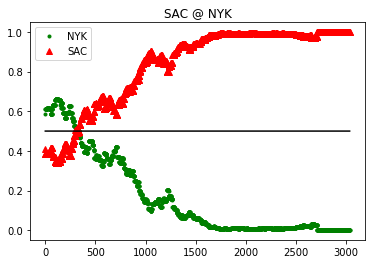

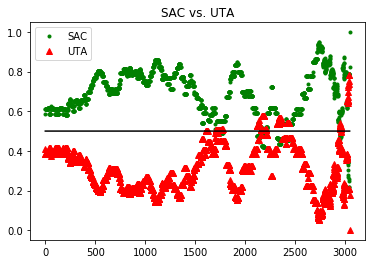

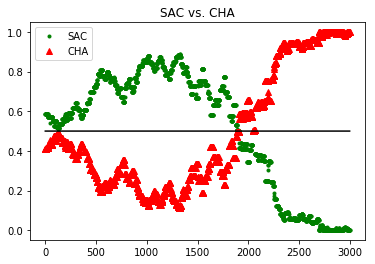

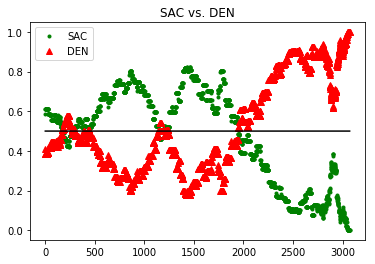

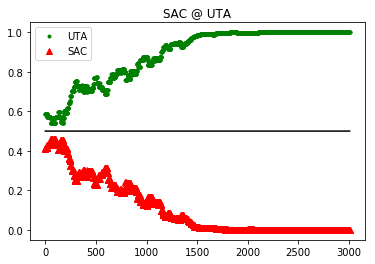

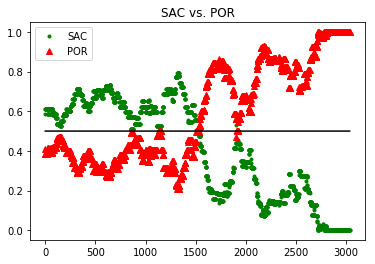

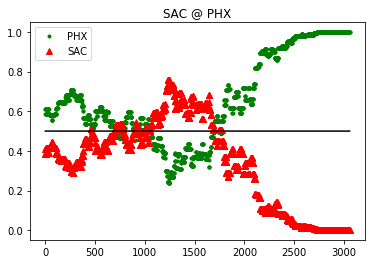

In [76]:
generate_win_probability_team('SAC')

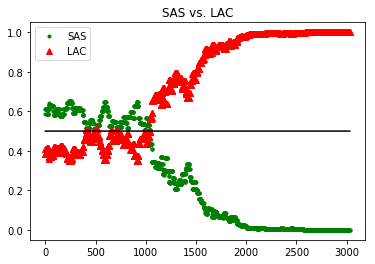

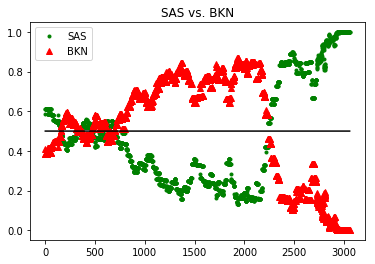

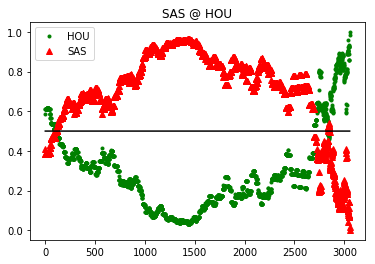

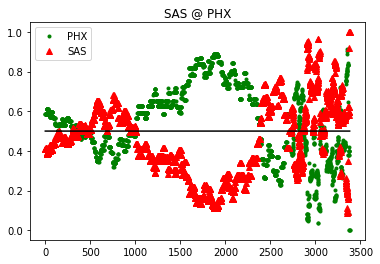

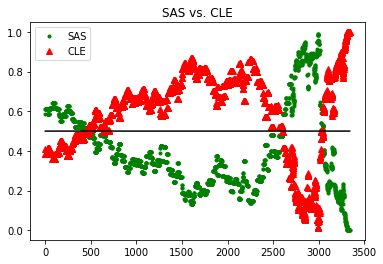

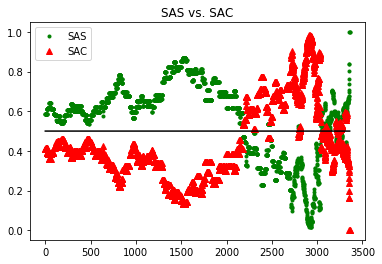

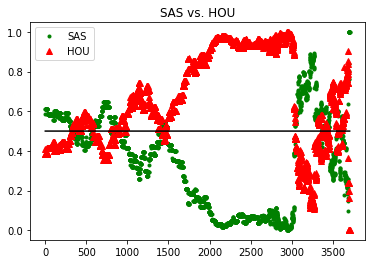

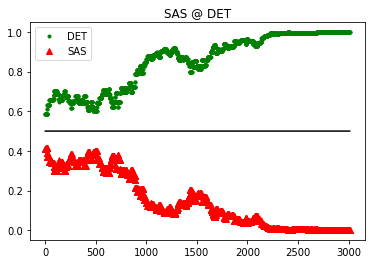

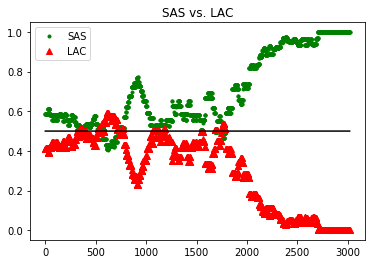

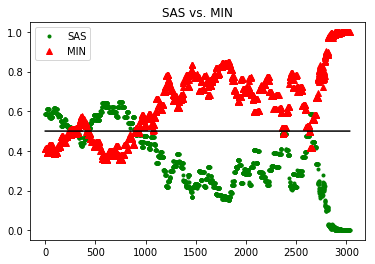

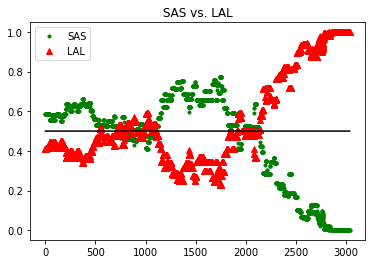

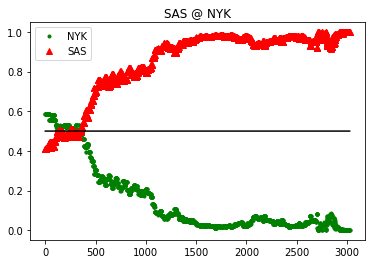

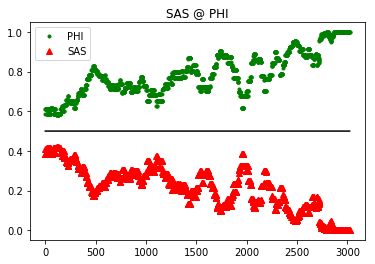

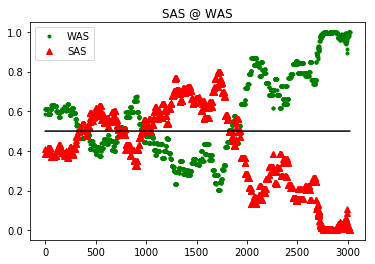

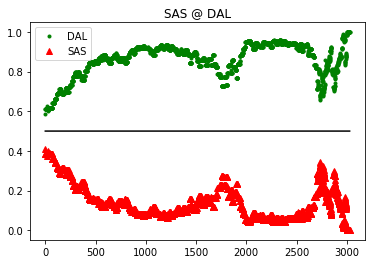

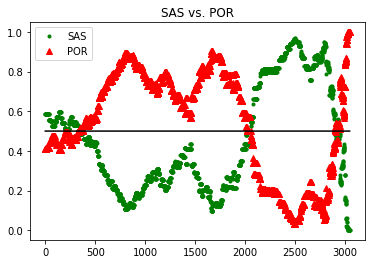

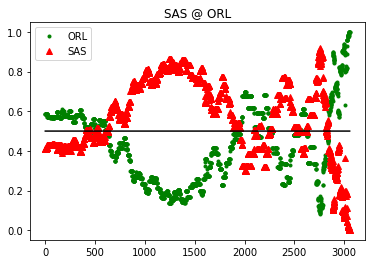

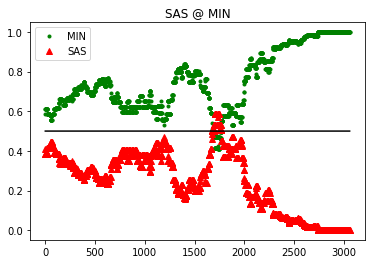

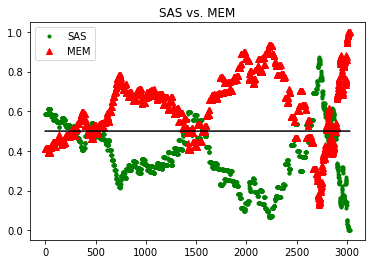

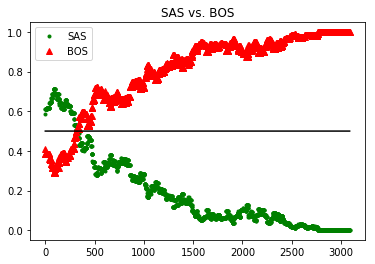

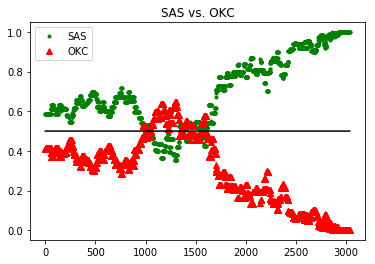

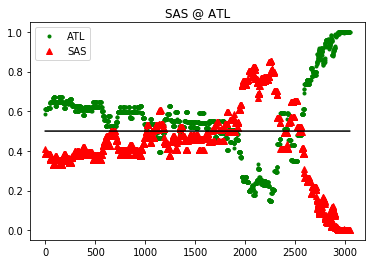

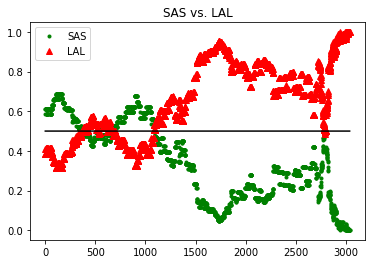

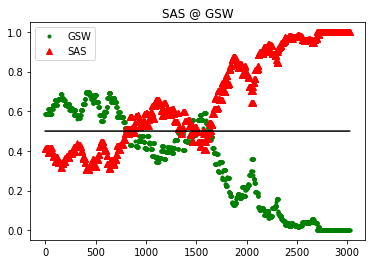

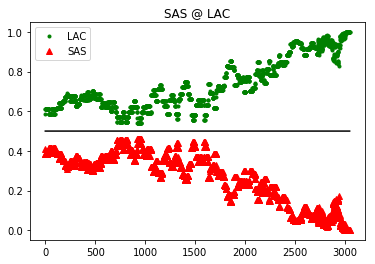

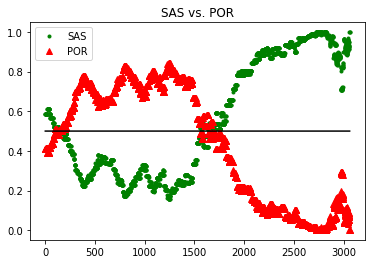

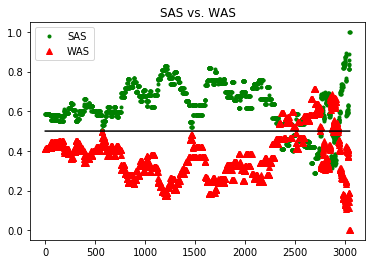

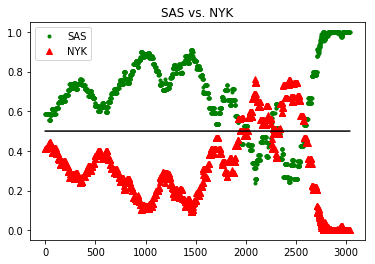

In [77]:
generate_win_probability_team('SAS')